# 🔹 🔸 BRAIN TUMOR DIAGNOSIS WITH ARTIFICIAL INTELLIGENCE 🔸 🔹

![](https://www.ibshospitals.com/blogthumb/660d16b2dbe1cUnderstanding%20The%20Various%20Brain%20Tumor%20Causes.webp)



# <a id='1'> 1️⃣ Giriş </a> 

Beyin tümörleri, çocuklarda ve yetişkinlerde görülen agresif hastalıklar arasında kabul edilir. Merkezi Sinir Sistemi (MSS) tümörlerinin büyük çoğunluğunu oluştururlar ve tüm MSS tümörlerinin %85-90'ını teşkil ederler. Her yıl yaklaşık 11,700 kişiye beyin tümörü teşhisi konulmaktadır. Bu tür tümörlerle mücadele eden bireylerin 5 yıllık sağkalım oranı erkeklerde %34, kadınlarda ise %36 olarak belirlenmiştir. Hastaların sağkalım sürelerini artırmak için doğru tanı ve tedavi planlamaları kritik öneme sahiptir. Beyin tümörlerinin tespitinde en yaygın kullanılan yöntem Manyetik Rezonans Görüntüleme (MR) teknolojisidir. MR taramalarıyla elde edilen büyük miktarda görüntü verisi, uzman radyologlar tarafından analiz edilir. Beyin tümörlerinin karmaşıklığı göz önüne alındığında, manuel muayene yöntemleri hatalara açık olabilir.

Literatürde yapılan çalışmalar, Makine Öğrenimi (ML) ve Yapay Zeka (AI) tekniklerinin otomatik sınıflandırma için kullanılmasının, manuel sınıflandırmadan daha yüksek doğruluk sağladığını ortaya koymuştur. Bu nedenle, Evrişimli Sinir Ağları (CNN), Yapay Sinir Ağları (ANN) ve Makine Öğrenimi gibi Algoritmalar kullanılarak geliştirilen ve beyin tümörlerinin tespit ve sınıflandırılmasında kullanılan sistemler, tıp uzmanlarına büyük destek sağlayacaktır.

# <a id='2'> 2️⃣ Genel Bakış </a> 

## <a id='2.1'>2.1. Kütüphaneleri İçe Aktarma</a> 
---
* **tensorflow**: Yüksek performanslı sayısal hesaplamalar ve karmaşık yapay sinir ağı yapılarını destekler.
---
* **keras:** Yüksek seviye bir sinir ağı API'sidir. Çeşitli derin öğrenme çatılarıyla (backend) entegrasyon sağlayarak, hızlı prototipleme ve sinir ağı modellerinin seri şekilde oluşturulması için tasarlanmıştır.
---
* **matplotlib:** Bilimsel ve mühendisliksel verileri görselleştirmek için kullanılan Python kütüphanesidir. Grafik, histogram ve diğer görsel araçlarla verilerin analiz edilmesini sağlar.
---
* **numpy:** Bilimsel hesaplama ve veri işleme için temel bir Python kütüphanesidir. Yüksek performanslı çok boyutlu diziler ve matris işlemleri sağlar, özellikle veri analizi ve model eğitiminde kullanılır.
---
* **cv2 (OpenCV):** Bilgisayar görüşü ve görüntü işleme uygulamalarında kullanılan OpenCV'nin Python arabirimidir. Görüntü işleme algoritmaları, görsel tanıma ve analiz için geniş bir araç seti sunar.
---
* **sklearn (scikit-learn):** Makine öğrenimi algoritmaları ve veri madenciliği araçları sağlayan bir Python kütüphanesidir. Sınıflandırma, regresyon, kümeleme, boyut indirgeme ve model değerlendirme gibi işlemleri kolayca gerçekleştirmeye olanak tanır.
---
* **os:** İşletim sistemi düzeyinde işlemler yapmak için kullanılan bir Python kütüphanesidir. Dosya yönetimi, dizin işlemleri, çevre değişkenleri ve işletim sistemi ile ilgili diğer işlevleri sağlar.
---
* **joblib:** Python nesnelerinin depolanması ve yüklenmesi için kullanılan bir kütüphanedir. Özellikle büyük veri nesnelerini etkin bir şekilde yönetmek ve makine öğrenimi modellerini kaydetmek için tercih edilir.
---
* **seaborn:** Veri görselleştirmesi için kullanılan bir Python kütüphanesidir. matplotlib üzerine inşa edilmiş olup, daha estetik ve bilgilendirici grafikler oluşturmak için tasarlanmıştır.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras import layers, metrics
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, InputLayer, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from time import time
import os
import joblib
import seaborn as sns

## <a id='2.2'>2.2. Veri Hazırlama</a> 
Toplamda 3060 adet beyin MRI görüntüsünden oluşan veri seti, Kaggle platformunda bulunan "[Br35H :: Brain Tumor Detection 2020](https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection?select=no)" adlı bir veri setidir. Görüntüler, "yes" (tumor), "no" (normal) ve "pred" olmak üzere üç farklı klasör altında düzenlenmiştir. Tumor sınıfı 1500 görüntü içerirken, normal sınıfı da 1500 görüntüden oluşmaktadır. "pred" klasöründe ise etiketsiz 60 görüntü bulunmaktadır. Bu çalışma kapsamında sadece "yes" ve "no" klasörlerindeki toplam 3000 görüntü kullanılmıştır.

In [17]:
dataset_path = r'C:\Users\tubitak\Desktop\BrainT\dataset'  # Veri setinin bulunduğu ana dizin yolu
data = []  # Görüntülerin depolanacağı liste
labels = []  # Etiketlerin depolanacağı liste

# 'tumor' ve 'normal' olmak üzere iki sınıf için döngü ile klasörler gezileçektir
for case in ['tumor', 'normal']:
    case_path = os.path.join(dataset_path, case) 
    
    for file_name in os.listdir(case_path):
        file_path = os.path.join(case_path, file_name)  

        # Dosyayı okuyup float32 türünde bir diziye dönüştürme
        image = cv2.imread(file_path).astype('float32')
        # Görüntüyü 224x224 boyutuna yeniden boyutlandırma ve veri listesine ekleme
        data.append(cv2.resize(image, (224, 224)))
        # Etiket listesine sınıf adını ekleme
        labels.append(case)

# 📌 
`LabelBinarizer` ve `to_categorical` işlemleri, makine öğrenimi ve derin öğrenme modelleri için sınıf etiketlerini hazırlamak için kullanılır. `LabelBinarizer`, kategorik sınıf etiketlerini ikili (binary) formata dönüştürürken, `to_categorical` fonksiyonu bu ikili formattaki etiketleri one-hot encoding'e çevirir. Bu işlemler, veri setlerindeki sınıfların sayısal olarak temsil edilmesini sağlayarak, model eğitimi ve performans değerlendirmesi süreçlerinde kullanılır. Bu şekilde, modellerin doğru şekilde çalışması ve kategorik verilerle etkin bir şekilde işlem yapması sağlanır.

---

In [18]:
from tensorflow.keras.utils import to_categorical  
from sklearn.preprocessing import LabelBinarizer 

lb = LabelBinarizer()  # LabelBinarizer objesi oluşturma
labelss = lb.fit_transform(labels)  # Etiketleri ikili formda (binary) temsil etmek için LabelBinarizer kullanarak dönüşüm yapma
labelss = to_categorical(labelss)  # Kategorik (one-hot) dönüşüm: ikili etiketlerden one-hot encoding'e geçiş yapma

# 🔎
Verileri numpy dizisine dönüştürmek, hızlı ve etkili veri işleme sağlayarak makine öğrenimi modellerinin performansını artırır. Ayrıca, çok boyutlu veri manipülasyonu için idealdir ve birçok makine öğrenimi kütüphanesiyle uyumluluk sağlar. Bellek yönetimi ve işlem hızı açısından önemli avantajlar sunar.

---

In [19]:
data = np.array(data) # Veri listesini numpy dizisine dönüştürme
labelss = np.array(labelss) # Etiket  listesini numpy dizisine dönüştürme

In [20]:
labelss.shape

(3000, 2)

In [21]:
data.shape

(3000, 224, 224, 3)

# ☑️
Normalizasyon işlemi: Görüntü piksellerini 0 ile 1 arasına ölçeklendirerek, modelin öğrenme sürecini stabil hale getirir ve eğitim verilerinin daha etkili bir şekilde işlenmesini sağlar.

🔹 Aşağıda normalizasyon işleminden önce ve sonsası için data'nın içeriği incelenebilir.

In [22]:
data[10]

array([[[176.63095   , 176.63095   , 176.63095   ],
        [ 89.969246  ,  89.969246  ,  89.969246  ],
        [104.96217   , 104.96217   , 104.96217   ],
        ...,
        [101.42939   , 101.42939   , 101.42939   ],
        [ 88.511665  ,  88.511665  ,  88.511665  ],
        [177.28885   , 177.28885   , 177.28885   ]],

       [[117.54606   , 117.54606   , 117.54606   ],
        [ 16.785078  ,  16.785078  ,  16.785078  ],
        [ 11.364159  ,  11.364159  ,  11.364159  ],
        ...,
        [  1.8415178 ,   1.8415178 ,   1.8415178 ],
        [  5.581852  ,   5.581852  ,   5.581852  ],
        [115.3063    , 115.3063    , 115.3063    ]],

       [[112.83034   , 112.83034   , 112.83034   ],
        [ 12.102958  ,  12.102958  ,  12.102958  ],
        [ 11.258729  ,  11.258729  ,  11.258729  ],
        ...,
        [ 24.855967  ,  24.855967  ,  24.855967  ],
        [ 10.178233  ,  10.178233  ,  10.178233  ],
        [110.866745  , 110.866745  , 110.866745  ]],

       ...,

      

In [23]:
def process_images(images):
    processed_images = []
    # Her bir görüntüyü 0 ile 1 arasına normalize etme işlemi yapılır
    for img in images:
        img = img / 255.0  # Görüntüyü 0-255 aralığından 0-1 aralığına dönüştürür
        processed_images.append(img)
    return np.array(processed_images)  # İşlenmiş görüntüleri numpy dizisine dönüştürerek döndürür

# Veri kümesinin görüntülerini işleyerek normalize edilmiş veri seti oluşturulur
data_processed = process_images(data)

In [24]:
data_processed[10]

array([[[0.6926704 , 0.6926704 , 0.6926704 ],
        [0.35282058, 0.35282058, 0.35282058],
        [0.41161636, 0.41161636, 0.41161636],
        ...,
        [0.39776233, 0.39776233, 0.39776233],
        [0.34710458, 0.34710458, 0.34710458],
        [0.6952504 , 0.6952504 , 0.6952504 ]],

       [[0.46096495, 0.46096495, 0.46096495],
        [0.06582384, 0.06582384, 0.06582384],
        [0.04456533, 0.04456533, 0.04456533],
        ...,
        [0.00722164, 0.00722164, 0.00722164],
        [0.02188962, 0.02188962, 0.02188962],
        [0.45218155, 0.45218155, 0.45218155]],

       [[0.44247192, 0.44247192, 0.44247192],
        [0.04746258, 0.04746258, 0.04746258],
        [0.04415188, 0.04415188, 0.04415188],
        ...,
        [0.09747438, 0.09747438, 0.09747438],
        [0.03991464, 0.03991464, 0.03991464],
        [0.43477154, 0.43477154, 0.43477154]],

       ...,

       [[0.43608192, 0.43608192, 0.43608192],
        [0.02324946, 0.02324946, 0.02324946],
        [0.05332633, 0

# 🔀 Train-Test Split

Sklearn kütüphanesinin train_test_split fonksiyonu kullanılarak veri seti eğitim ve test alt kümelerine bölünmüştür. Bölme işlemi %10 test ve %90 eğitim olacak şekilde gerçekleştirilmiştir. 
- train (%90): 2700
- test (%10): 300

In [25]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test) = train_test_split(data_processed,labelss,random_state = 25,test_size = 0.10)
print("Train Veri Sayısı:",x_train.shape[0])
print("Test Veri Sayısı:",x_test.shape[0])

Train Veri Sayısı: 2700
Test Veri Sayısı: 300


In [26]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [27]:
x_train.shape

(2700, 224, 224, 3)

In [28]:
y_train.shape

(2700, 2)

# 📍
Aşağıdaki kod parçası, eğitim ve test veri kümelerini Numpy dizileri olarak belirtilen dizin altında kaydetmeye yöneliktir. Bu işlem genel olarak veri yönetimi ve tekrar kullanılabilirlik açısından önem taşır. Veri setlerinin Numpy dizileri olarak kaydedilmesi, verilerin kalıcı olarak saklanmasını sağlar ve daha sonra model eğitimi veya değerlendirmesi için kolayca yeniden yüklenebilir. Bu durum, model eğitim sürecinde veri setlerinin tekrarlanabilirliğini sağlar ve sonuçların tutarlı olmasına yardımcı olur.

---

In [36]:
dataset_path =r"C:/Users/tubitak/Desktop/BrainT/dataset"
np.save(dataset_path+"/x_train.npy",x_train)
np.save(dataset_path+"/y_train.npy",y_train)
np.save(dataset_path+"/x_test.npy",x_test)
np.save(dataset_path+"/y_test.npy",y_test)

In [2]:
dataset_path =r"C:/Users/tubitak/Desktop/BrainT/dataset"
x_train =np.load(dataset_path+"/x_train.npy")
y_train =np.load(dataset_path+"/y_train.npy")
x_test =np.load(dataset_path+"/x_test.npy")
y_test =np.load(dataset_path+"/y_test.npy")

# 🌟
Verileri vektör formatına dönüştürme işlemi, her bir görüntünün piksel değerlerini bir satır içinde tutacak şekilde düzleştirmektir. Örneğin, 224x224 boyutundaki görüntüler, 150528 (224x224) özellikli bir vektöre dönüştürülür. Bu format genellikle makine öğrenimi modelleri için girdi olarak kullanılan formattır, çünkü modeller genellikle düz vektör formatında veri işler.

In [29]:
# Verileri 224x224 görüntü formatından 150528 özellikli vektör formatına dönüştürme
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)

In [30]:
X_train.shape

(2700, 150528)

# 🔎
One-hot encoding ile temsil edilen sınıf etiketlerini gerçek sınıf etiketlerine dönüştürme işlemi, sınıflandırma modellerinin eğitimi, performans değerlendirmesi ve model tahminlerinin yorumlanması için gereklidir. Bu dönüşüm, modelin tahminlerini gerçek sınıflarla karşılaştırma imkanı sağlar ve performans metriklerinin hesaplanmasında kullanılır. Ayrıca, bazı makine öğrenimi kütüphaneleri doğrudan one-hot encoded etiketlerle çalışırken, bu dönüşüm veri setinin uygun formatta işlenmesini sağlar. Sonuç olarak, gerçek sınıf etiketlerine dönüşüm, model eğitimi sürecinin ve sonuçlarının doğruluğunu sağlamak için önemli bir adımdır.

🔹 Aşağıda etiketlerin dönüştürme işleminden önce ve sonsası için Y_train'in içeriği incelenebilir.

In [31]:
y_train.shape

(2700, 2)

In [32]:
# Eğitim ve test veri seti için one-hot encoded etiketlerden gerçek sınıf etiketlerine dönüşüm
Y_train = np.argmax(y_train, axis=1)
Y_test = np.argmax(y_test, axis=1)

In [33]:
Y_train.shape

(2700,)

## Veri dağılım grafikleri

### Sınıflar:
 🔴 Tumor: 1500   
    🔴 Normal: 1500

💠Veri setindeki 'tumor' ve 'normal' sınıflarının görsel dağılımını incelemek için iki pasta grafiği oluşturulmuştur. İlk grafikte sınıf etiketlerinin yüzde dağılımı gösterilirken, ikinci grafikte eğitim ve test veri oranlarına odaklanılır. 

💠Bu tür görselleştirmeler, veri setinin dengesizliklerini anlamak, eğitim-test bölümünü doğru yapmak ve model performansını değerlendirmek için kullanışlıdır.

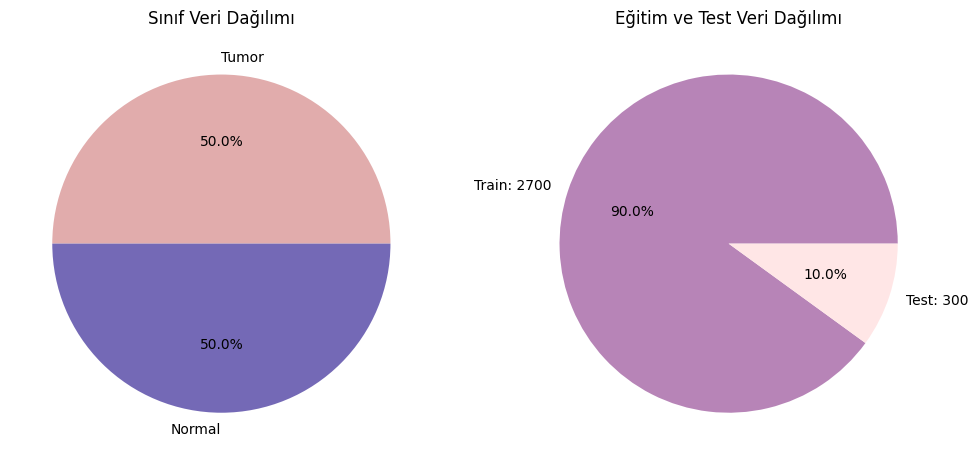

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 'tumor' ve 'normal' etiketlerinin sayısını bulmak için bir dictionary kullanılabilir
labels_count = {'tumor': 0, 'normal': 0}

# labels listesini döngü ile gezerek her bir etiketin sayısını güncelleme
for i in labels:
    labels_count[i] += 1

# Veri tanımları
labels1 = 'Tumor', 'Normal'
sizes1 = [labels_count['tumor'], labels_count['normal']]

# x_train ve x_test veri uzunluklarını alma
train_count = len(x_train)
test_count = len(x_test)

# Toplam veri sayısı
total_count = train_count + test_count

# Train ve test veri yüzdelik oranlarını hesaplama
train_percent = (train_count / total_count) * 100
test_percent = (test_count / total_count) * 100

# İlk pasta grafiği
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(sizes1, labels=labels1, colors=['#E1ACAC', '#7469B6'], autopct='%1.1f%%')
axs[0].set_title('Sınıf Veri Dağılımı')

# İkinci pasta grafiği
axs[1].pie([train_percent, test_percent], labels=['Train: 2700', 'Test: 300'], colors=['#B784B7', '#FFE6E6'], autopct='%1.1f%%')
axs[1].set_title('Eğitim ve Test Veri Dağılımı')

plt.show()


## Veri kümesinden birkaç örnek görüntü

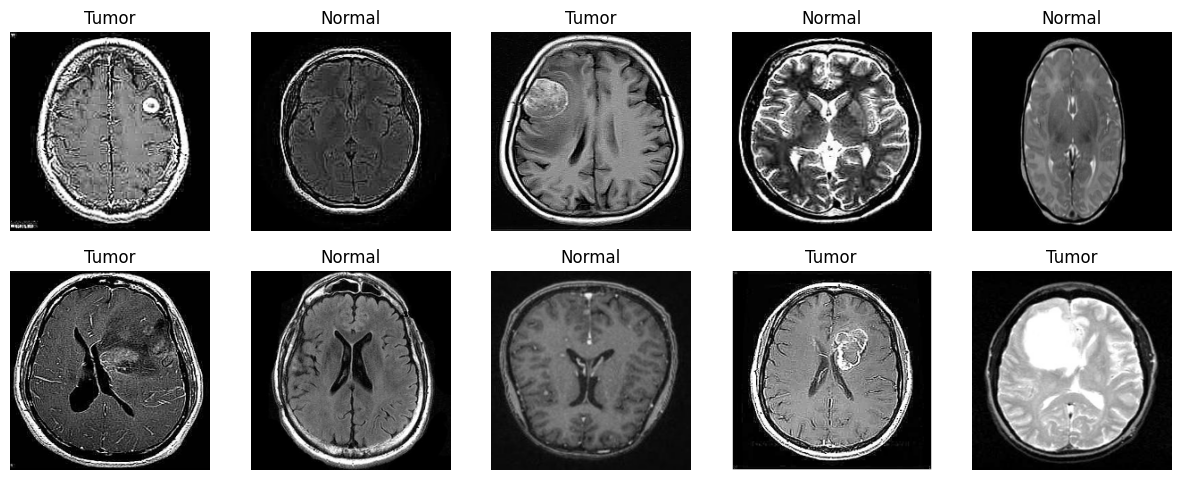

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Şekil oluşturma ve boyutunu belirleme
plt.figure(figsize=(15, 15))

# Veriden rastgele 10 öğe seçme
indices = np.random.choice(len(data), size=10, replace=False)

# Seçilen öğeleri görselleştirme döngüsü
for i, index in enumerate(indices):
    # 5x5 bir alt grafik düzeni oluşturma, i+1 ile indeks düzenlemesi
    plt.subplot(5, 5, i+1)
    
    # Veriyi normalize ederek görselleştirme
    plt.imshow(data[index] / 255.0)
    
    # Etiket kontrolü yaparak başlık belirleme
    if labels[index] == 'normal':
        plt.title("Normal")
    else:
        plt.title("Tumor")
    

    plt.axis('off')

# Şekli gösterme
plt.show()


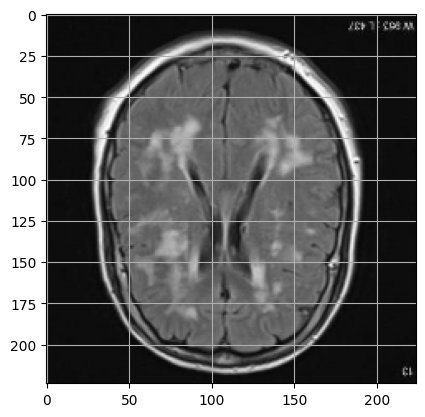

In [39]:
plt.figure()
plt.imshow(x_train[0])
plt.grid(True)
plt.show()

# 📌
## <a id='2.3'>2.3. Değerlendirme Metrikleri</a> 
Makine öğrenimi ve derin öğrenme modellerinin performansını değerlendirmek için çeşitli metrikler kullanılır. Bu metrikler, modelin ne kadar iyi genelleme yaptığını, yani eğitim verileri dışındaki veriler üzerinde ne kadar başarılı olduğunu ölçmek için önemlidir. Özellikle tıbbi görüntü analizi gibi kritik alanlarda modellerin doğruluğunu ve güvenilirliğini değerlendirmek hayati önem taşımaktadır. 

---

\begin{array}{|c|c|c|}
\hline
 & \text{Gerçek Durum: Positive} & \text{Gerçek Durum: Negative} \\
\hline
\text{Tahmin: Positive} & TP (\text{True Positive}) & FP (\text{False Positive}) \\
\hline
\text{Tahmin: Negative} & FN (\text{False Negative}) & TN (\text{True Negative}) \\
\hline
\end{array}


---
* TP (True Positive): Modelin doğru bir şekilde pozitif olarak tahmin ettiği durumların sayısı.
* TN (True Negative): Modelin doğru bir şekilde negatif olarak tahmin ettiği durumların sayısı.
* FP (False Positive): Modelin yanlış bir şekilde pozitif olarak tahmin ettiği durumların sayısı.
* FN (False Negative): Modelin yanlış bir şekilde negatif olarak tahmin ettiği durumların sayısı.

---
🔴 **Doğruluk (Accuracy):** Doğru tahmin edilen örneklerin toplam örnek sayısına oranıdır.

$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $ 

🔴 **Hassasiyet (Precision):** modelin pozitif olarak tahmin ettiği örneklerin ne kadarının gerçekten pozitif olduğunu gösteren bir ölçüttür. 

$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $

🔴 **Duyarlılık (Recall):** Gerçek pozitiflerin (TP) model tarafından ne kadarının tespit edildiğini gösteren bir ölçüttür.

$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $

🔴 **F1 Skoru (F1 Score):** Precision ve recall'in harmonik ortalamasıdır.

$ \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $


---

🔵 **Confusion Matrix (Karışıklık Matrisi) :** Bir sınıflandırma modelinin performansını detaylı olarak değerlendirmek için kullanılan önemli bir araçtır. Bu matris, gerçek ve model tarafından tahmin edilen sınıflar arasındaki ilişkiyi görsel olarak sunar.



\begin{array}{|c|c|c|}
\hline
 & \text{Gerçek Durum: Positive} & \text{Gerçek Durum: Negative} \\
\hline
\text{Tahmin: Positive} & TP (\text{True Positive}) & FP (\text{False Positive}) \\
\hline
\text{Tahmin: Negative} & FN (\text{False Negative}) & TN (\text{True Negative}) \\
\hline
\end{array}

---

🟢 **Classification Report (Sınıflandırma Raporu) :** Bir makine öğrenimi algoritmasının tahmin ettiği sınıflar ile gerçek veri setindeki sınıflar arasındaki uyumu detaylı olarak analiz etmek için kullanılan bir rapordur. 


| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| Tumor       | 0.84      | 0.99   | 0.91     | 150     |
| Normal      | 0.99      | 0.81   | 0.89     | 150     |
| Accuracy    |           |        | 0.90     | 300     |
| Macro Avg   | 0.92      | 0.90   | 0.90     | 300     |
| Weighted Avg| 0.92      | 0.90   | 0.90     | 300     |


---
🟤 **ROC Eğrisi ve AUC**

ROC eğrisi ve AUC, sınıflandırma modellerinin performansını değerlendirmek için kullanılan önemli ölçütlerdir. ROC eğrisi, farklı sınıflandırma eşik değerlerinde modelin duyarlılığını (recall) ve özgüllüğünü (specificity) gösteren bir grafiktir. AUC ise ROC eğrisinin altında kalan alanı ifade eder ve bu alan, modelin farklı sınıfları ne kadar iyi ayırt edebildiğini ölçer.

Yani AUC, 0 ile 1 arasında değişen bir değer olup, modelin sınıfları ne kadar doğru ayırt edebildiğini gösterir. AUC değeri ne kadar yüksekse, modelin 0 sınıfını 0 olarak ve 1 sınıfını 1 olarak tahmin etme yeteneği o kadar iyidir.

ROC eğrisini elde etmek için TPR (True Positive Rate) ve FPR (False Positive Rate) parametreleri kullanılır. 

$\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$


$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$



In [8]:
from sklearn.metrics import classification_report

def print_classification_report(model, X_test, y_test):
    class_names = ['Tumor', 'Normal']  # Sınıf isimleri
    
    # Eğer sınıf isimleri belirtilmemişse, default olarak 'Class 0', 'Class 1' şeklinde isimler atanır.
    if class_names is None:
        class_names = ['Class ' + str(i) for i in range(len(set(y_test)))]
    
    y_pred = model.predict(X_test)  # Modelin X_test veri kümesi üzerinde tahmin yapması
    report = classification_report(y_test, y_pred, target_names=class_names)  # Classification report oluşturulması
    print(report)  

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    class_labels = ["Tumor", "Normal"]  # Sınıf etiketleri

    # Modelin X_test üzerinde tahmin yapması
    y_pred = model.predict(X_test)
    
    # Confusion matrix 
    cm = confusion_matrix(y_test, y_pred)

    # Confusion matrix'i görselleştirme
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted labels')  # Tahmin edilen sınıf etiketleri
    plt.ylabel('True labels')       # Gerçek sınıf etiketleri
    plt.title('Confusion Matrix')  
    plt.show()  

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(model, X_test, y_test):
    # Modelin tahminini yapın
    y_pred = model.predict(X_test)

    # Her bir sınıf için ROC eğrilerini ve alanlarını hesaplama
    

    # Her bir sınıf için ROC eğrilerini çizme
    for i in range(2):  
        fpr, tpr, _ = roc_curve((y_test == i).astype(int), (y_pred == i).astype(int))
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label='ROC curve of class {} (area = {:0.2f})'.format(i, roc_auc))

    # Micro-average için ROC eğrisini hesaplama ve çizme
    fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, color='orange', lw=2, linestyle='--', label='Micro-average ROC curve (area = {:0.2f})'.format(roc_auc_micro))

    # Rastgele seçim tahmini yaparak oluşturulan ROC eğrisini çizme
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

# Model Eğitimi

Bu çalışmada, makine öğrenmesi yöntemlerinden altı farklı sınıflandırıcı, ayrıca yapay sinir ağı (ANN) ve evrişimli sinir ağı (CNN) kullanılarak bir dizi model eğitimi gerçekleştirilmiştir. 

Eğitilen modeller aşağıda listelenmiştir. 

🔰 **Makine öğrenmesi algoritmaları:**

    💠K-Nearest Neighbors
  
    💠Decision Tree
  
    💠Random Forest
  
    💠Support Vector Machine
  
    💠Gradient Boosting
  
    💠Logistic Regression
  
🔰 **Yapay Sinir Ağları(ANN)**

🔰 **Evrişimli Sinir Ağları (CNN)**

    💠Önerilen CNN Modeli
  
    💠ResNet50 Modeli

---
Her bir model için eğitim sürecinde k=5 kat çapraz doğrulama yöntemi uygulanmıştır. 

📍 **Cross-validation**, bir makine öğrenimi evya derin öğrenme modelinin genelleştirme yeteneğini değerlendirmek için kullanılan bir yöntemdir. Veri kümesi genellikle eşit büyüklükte k (çalışma kapsamında 5-kat kullanıldı) alt kümelere bölünür. Her bir kat sırayla test seti olarak kullanılırken, geri kalan k-1 kat birlikte eğitim seti olarak kullanılır. Bu işlem, modelin farklı veri parçaları üzerinde eğitilmesini ve test edilmesini sağlayarak, modelin ne kadar iyi genelleme yaptığını ölçmeyi amaçlar. Sonuç olarak, k döngü tamamlandıktan sonra elde edilen performans ölçütlerinin ortalaması alınarak modelin genel performansı değerlendirilir. Cross-validation, özellikle sınırlı veriye sahip durumlarda modelin güvenilirliğini artırmak ve aşırı uyum veya veriye özgü genelleme gibi sorunları tespit etmek için yaygın olarak kullanılan bir tekniktir.

![](https://images.prismic.io/turing/6598098d531ac2845a272519_image5_11zon_af97fe4b03.webp?auto=format,compress)

---
Her eğitim sürecinin sonunda, modelin sınıflandırma performansını değerlendirmek için doğruluk (accuracy), hassasiyet (precision), duyarlılık (recall), F1 skoru, sınıflandırma raporu, karışıklık matrisi ve roc eğrisi gibi ölçütler elde edilmiştir. Elde edilen bu değerlendirme metrikleri, modellerin performansını karşılaştırmak ve en uygun modeli seçmek için kullanılmıştır.



Son olarak, her bir model eğitimi tamamlandıktan sonra, eğitilmiş modeller sonradan kullanılmak üzere kaydedilmiştir. Bu adım, modelin tekrar eğitimden geçirilmeden önceki eğitilmiş halini saklamayı ve kullanıcıya veya başka bir çalışmaya referans olacak şekilde erişilebilir kılmayı amaçlamaktadır.

✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️

---

## 1. Classifier: K-Nearest Neighbors (KNN) 🚀

KNN, bir makine öğrenimi algoritmasıdır ve sınıflandırma ile regresyon problemlerinde kullanılır. Algoritmanın temel prensibi, veri noktalarının uzayda birbirine olan yakınlıklarına dayanır. Bir tahmin yapmak için, yeni bir veri noktasıyla diğer tüm veri noktaları arasındaki uzaklıklar hesaplanır ve belirlenen bir K değeri (komşu sayısı) kadar en yakın komşu seçilir. Sınıflandırma problemlerinde, en yakın K komşunun çoğunluk oyu alınarak yeni veri noktası o sınıfa atanır. Regresyon problemlerinde ise, en yakın K komşunun değerlerinin ortalaması alınarak yeni veri noktasının tahmin edilen değeri hesaplanır. KNN'nin avantajları arasında basitlik, yüksek doğruluk potansiyeli ve eğitim sürecinin olmaması (lazy learning) sayılabilir.

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

### Sonuçlar

K-Nearest Neighbors (KNN) algoritması, tıbbi veri sınıflandırmasında yüksek doğruluk (%90.3) ve dengeli bir performans sergilemiştir. Model, Tumor sınıfında %99 duyarlılık ve %84 hassasiyetle güçlü bir başarı gösterirken, Normal sınıfında %81 duyarlılık ve %99 hassasiyet ile nispeten daha az başarılı olmuştur. ROC eğrisi altında kalan alan (AUC) değeri 0.90 olarak belirlenmiştir, bu da modelin genel olarak iyi bir sınıflandırma yeteneğine sahip olduğunu göstermektedir.

Ancak, normal sınıfında yüksek yanlış negatif sayısı (28) dikkat çekmektedir ve bu, modelin bu sınıfta iyileştirmeye ihtiyaç duyduğunu göstermektedir.

---

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier nesnesini oluşturma ve tüm parametreleri belirleme
knn = KNeighborsClassifier(
    n_neighbors=7,  # Kullanılacak komşu sayısı
    weights='distance',  # Komşulara verilecek ağırlıklar ('uniform' veya 'distance')
    algorithm='auto',  # Kullanılacak algoritma ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,  # BallTree veya KDTree kullanılıyorsa, yaprak düğümlerinin boyutu
    p=2,  # Minkowski metriğinde kullanılacak güç parametresi (varsayılan olarak 2)
    metric='minkowski',  # Komşuluk metriği (varsayılan olarak 'minkowski')
    metric_params=None,  # Metric fonksiyonu için ek parametreler
    n_jobs=None  # Komşuluk sorgusu yapılırken kullnılacak iş parçacığı sayısı
)

# Cross-validation işlemi için k-kat sayısını belirleme (örneğin k=5)
k = 5

# Cross-validation ile modelin performansını değerlendirme
cv_scores = cross_val_score(knn, X_train, Y_train, cv=k)

# Elde edilen cross-validation skorlarını yazdırma
print("Cross-validation skorları:", cv_scores)

# Ortalama cross-validation skorunu hesaplama
mean_cv_score = cv_scores.mean()
print("Ortalama cross-validation skoru:", mean_cv_score)

# Modele eğitmek için X_train ve y_train'i vererek eğitimi başlatma
knn.fit(X_train, Y_train)

# Test verisi üzerinde tahmin yapma
y_pred=knn.predict(X_test)

# Test metriklerini hesaplama ve yazdırma
print('Test accuracy: ',accuracy_score(Y_test,y_pred))
print('f1-score: ', f1_score(Y_test,y_pred, average='weighted'))
print('recall: ',recall_score(Y_test,y_pred, average='weighted'))
print('precision: ',precision_score(Y_test,y_pred, average='weighted'))

Cross-validation skorları: [0.86296296 0.89074074 0.85       0.88333333 0.86296296]
Ortalama cross-validation skoru: 0.8699999999999999
Test accuracy:  0.9033333333333333
f1-score:  0.9025439392411869
recall:  0.9033333333333333
precision:  0.9168389141518534


In [66]:
print_classification_report(knn, X_test, Y_test)

              precision    recall  f1-score   support

       Tumor       0.84      0.99      0.91       150
      Normal       0.99      0.81      0.89       150

    accuracy                           0.90       300
   macro avg       0.92      0.90      0.90       300
weighted avg       0.92      0.90      0.90       300



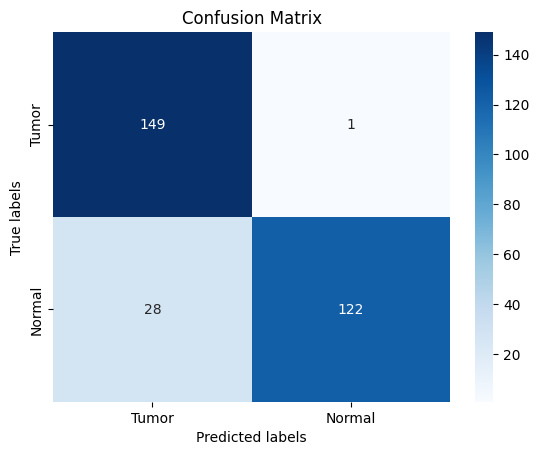

In [42]:
plot_confusion_matrix(knn, X_test, Y_test)

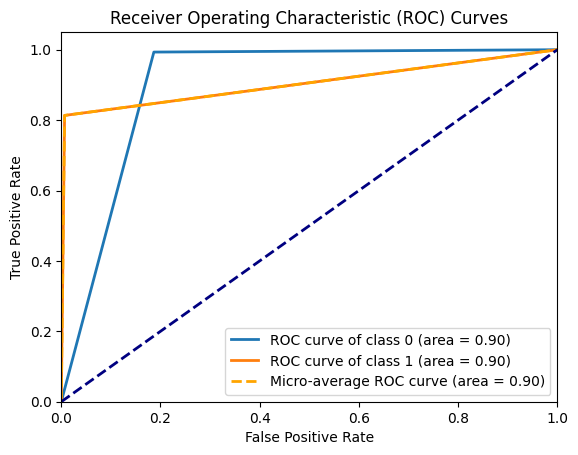

In [44]:
plot_roc_curves(knn, X_test, Y_test)

In [18]:
# Modeli kaydetme
joblib.dump(knn, 'knn.pkl')

# Modeli yükleme
#knn = joblib.load('knn.pkl')

['knn.pkl']

## 2. Classifier: Decision Tree 🚀

**Decision Tree (Karar Ağacı)**, sınıflandırma ve regresyon problemleri için kullanılan bir makine öğrenimi algoritmasıdır. Algoritma, veri kümesindeki özelliklerin değerlerine göre karar kuralları oluşturarak bir ağaç yapısı oluşturur. Her iç düğüm (node) bir özellik testini temsil ederken, her dal bir özellik değerini ve sonuçta bir yaprak düğüm (leaf node) elde edilene kadar devam eder. Yaprak düğümlerinde ise sınıflandırma problemlerinde en yaygın sınıf etiketi veya regresyon problemlerinde tahmin edilen değer verilir. Karar ağaçları, veriye kolay uyum sağlama yeteneği, yorumlanabilirlikleri ve doğal olarak kategorik verilerle çalışabilme özellikleri ile öne çıkar. 

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

### Sonuçlar
Decision Tree algoritması, tıbbi veri sınıflandırmasında %83 test doğruluğu ve %82.99 F1 skoru ile makul bir performans göstermiştir. Ortalama çapraz doğrulama skoru %84 olan model, Tumor ve Normal sınıflarında sırasıyla 23 ve 28 yanlış tahmin yapmıştır. ROC eğrisi altındaki alan (AUC) değeri %83 olarak belirlenmiş, bu da modelin sınıflandırma yeteneğinin ortalama olduğunu göstermektedir. Ancak, hatalı tahminlerin özellikle yanlış negatif vakalarda yüksek olması, potansiyel tümör vakalarının gözden kaçmasına yol açabilir. Decision tree, anlaşılabilir yapısıyla tıbbi karar destek sistemlerinde faydalı olabilir, ancak performansını artırmak için iyileştirilmesi gerektiği açıktır.

---

In [45]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier nesnesini oluşturna ve tüm parametreleri belirleme
dtc = DecisionTreeClassifier(
    criterion='gini',  # Bölme kriteri ('gini' veya 'entropy')
    splitter='best',  # Bölme stratejisi ('best' veya 'random')
    max_depth=None,  # Karar ağacının maksimum derinliği
    min_samples_split=2,  # Bir iç düğümü bölmeden önce gereken minimum örnek sayısı
    min_samples_leaf=1,  # Bir yaprak düğümü oluşturmak için gereken minimum örnek sayısı
    min_weight_fraction_leaf=0.0,  # Bir yaprak düğümü oluşturmak için gereken minimum ağırlık fraksiyonu
    max_features=None,  # Her bölme için değerlendirilecek maksimum özellik sayısı
    random_state=None,  # Rastgelelik durumu
    max_leaf_nodes=None,  # Maksimum yaprak düğüm sayısı
    min_impurity_decrease=0.0,  # Bölme yaparken gereken minimum impurity decrease
    class_weight=None,  # Sınıf ağırlıkları
    ccp_alpha=0.0  # Cost-complexity pruning parametresi
)

# Cross-validation işlemi için k-kat sayısını belirleme (örneğin k=5)
k = 5

# Cross-validation ile modelin performansını değerlendirme
cv_scores = cross_val_score(dtc, X_train, Y_train, cv=k)

# Elde edilen cross-validation skorlarını yazdırma
print("Cross-validation skorları:", cv_scores)

# Ortalama cross-validation skorunu hesaplama
mean_cv_score = cv_scores.mean()
print("Ortalama cross-validation skoru:", mean_cv_score)

# Modele eğitmek için X_train ve y_train'i vererek eğitimi başlatma
dtc.fit(X_train, Y_train)

# Test verisi üzerinde tahmin yapma
y_pred=dtc.predict(X_test)

# Test metriklerini hesaplama ve yazdırma
print('Test accuracy: ',accuracy_score(Y_test,y_pred))
print('f1-score: ', f1_score(Y_test,y_pred, average='weighted'))
print('recall: ',recall_score(Y_test,y_pred, average='weighted'))
print('precision: ',precision_score(Y_test,y_pred, average='weighted'))

Cross-validation skorları: [0.82962963 0.85925926 0.82037037 0.8537037  0.83703704]
Ortalama cross-validation skoru: 0.8400000000000001
Test accuracy:  0.83
f1-score:  0.8299527646568492
recall:  0.83
precision:  0.8303670745272526


In [67]:
print_classification_report(dtc, X_test, Y_test)

              precision    recall  f1-score   support

       Tumor       0.82      0.85      0.83       150
      Normal       0.84      0.81      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



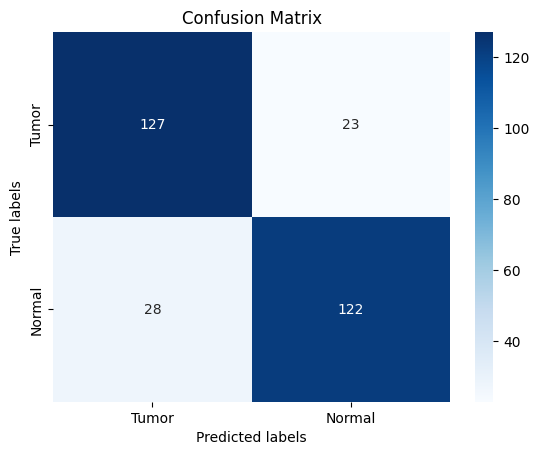

In [46]:
plot_confusion_matrix(dtc, X_test, Y_test)

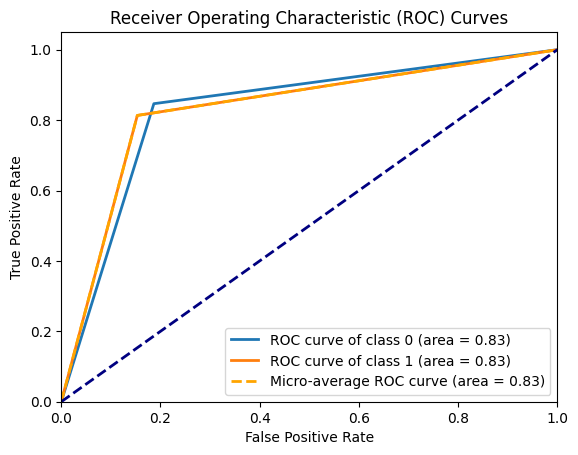

In [48]:
plot_roc_curves(dtc, X_test, Y_test)

In [89]:
# Modeli kaydetme
joblib.dump(dtc, 'dtc.pkl')

# Modeli yükleme
#dtc = joblib.load('dtc.pkl')

['dtc.pkl']

## 3. Classifier: Random Forest 🚀

Random Forest (Rastgele Orman), sınıflandırma ve regresyon problemleri için kullanılan bir makine öğrenimi algoritmasıdır ve Decision Tree (Karar Ağacı) algoritmasının bir genişlemesidir. Random Forest, birçok karar ağacının bir araya gelmesiyle oluşur ve her bir ağaç veri kümesinin rastgele alt kümeleri üzerinde eğitilir. Her ağaç, kendi içinde bağımsız olarak kararlar alır ve genel sonuçları oylama yaparak belirler. Bu sayede, tek bir karar ağacının aşırı uydurma (overfitting) eğilimini azaltarak daha iyi genelleme yapabilir. Random Forest, geniş özellik kümesiyle çalışabilme, doğrusal olmayan ilişkileri modelleme yeteneği ve yüksek doğruluk potansiyeli gibi avantajlara sahiptir. Ayrıca, veri kümesinin büyüklüğüne ve karmaşıklığına bağlı olarak genellikle karar ağaçlarından daha istikrarlı sonuçlar üretir.

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

### Sonuçlar

Random Forest algoritması, tıbbi veri sınıflandırmasında güçlü bir performans sergilemiştir. Ortalama %95.15 çapraz doğrulama doğruluğu ile model, test verisinde %94.33 doğruluk ve %94.33 F1 skoru elde etmiştir. Tumor sınıfında %96 hassasiyet ve %93 duyarlılık, Normal sınıfında ise %93 hassasiyet ve %96 duyarlılık sergileyerek, her iki sınıf için de dengeli ve yüksek performans göstermiştir. Yanlış sınıflandırmalarda Tumor sınıfında 11 ve Normal sınıfında 6 hata yapılmıştır. ROC eğrisi altında kalan alan (AUC) %94 olan model, genel olarak yüksek doğruluk oranı ve düşük yanlış sınıflandırma ile tıbbi veri analizinde güvenilir bir araç olduğunu kanıtlamıştır.

---

In [49]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier nesnesini oluşturma ve tüm parametreleri belirleme
rfc = RandomForestClassifier(
    n_estimators=100,  # Oluşturulacak ağaç sayısı
    criterion='gini',  # Bölme kriteri ('gini' veya 'entropy')
    max_depth=None,  # Her bir karar ağacının maksimum derinliği
    min_samples_split=2,  # Bir iç düğümü bölmeden önce gereken minimum örnek sayısı
    min_samples_leaf=1,  # Bir yaprak düğümü oluşturmak için gereken minimum örnek sayısı
    min_weight_fraction_leaf=0.0,  # Bir yaprak düğümü oluşturmak için gereken minimum ağırlık fraksiyonu
    max_features='auto',  # Her bölme için değerlendirilecek maksimum özellik sayısı
    max_leaf_nodes=None,  # Maksimum yaprak düğüm sayısı
    min_impurity_decrease=0.0,  # Bölme yaparken gereken minimum impurity decrease
    bootstrap=True,  # Veri örnekleme stratejisi
    oob_score=False,  # Out-of-bag örnekleme kullanılarak doğruluk hesaplanacak mı
    n_jobs=None,  # Paralel işlem sayısı
    random_state=None,  # Rastgelelik durumu
    verbose=0,  # Ayıklama durumu
    warm_start=False,  # Her bir ağaç modelini önceki çağrılardan devam ettirir mi
    class_weight=None,  # Sınıf ağırlıkları
    ccp_alpha=0.0  # Cost-complexity pruning parametres
)

# Cross-validation işlemi için k-kat sayısını belirleme (örneğin k=5)
k = 5

# Cross-validation ile modelin performansını değerlendirme
cv_scores = cross_val_score(rfc, X_train, Y_train, cv=k)

# Elde edilen cross-validation skorlarını yazdırma
print("Cross-validation skorları:", cv_scores)

# Ortalama cross-validation skorunu hesaplama
mean_cv_score = cv_scores.mean()
print("Ortalama cross-validation skoru:", mean_cv_score)

# Modele eğitmek için X_train ve y_train'i vererek eğitimi başlatma
rfc.fit(X_train, Y_train)

# Test verisi üzerinde tahmin yapma
y_pred=rfc.predict(X_test)

# Test metriklerini hesaplama ve yazdırma
print('Test accuracy: ',accuracy_score(Y_test,y_pred))
print('f1-score: ', f1_score(Y_test,y_pred, average='weighted'))
print('recall: ',recall_score(Y_test,y_pred, average='weighted'))
print('precision: ',precision_score(Y_test,y_pred, average='weighted'))

Cross-validation skorları: [0.96481481 0.95555556 0.94074074 0.95185185 0.94444444]
Ortalama cross-validation skoru: 0.9514814814814814
Test accuracy:  0.9433333333333334
f1-score:  0.9433175882189497
recall:  0.9433333333333334
precision:  0.9438264738598444


In [68]:
print_classification_report(rfc, X_test, Y_test)

              precision    recall  f1-score   support

       Tumor       0.96      0.93      0.94       150
      Normal       0.93      0.96      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



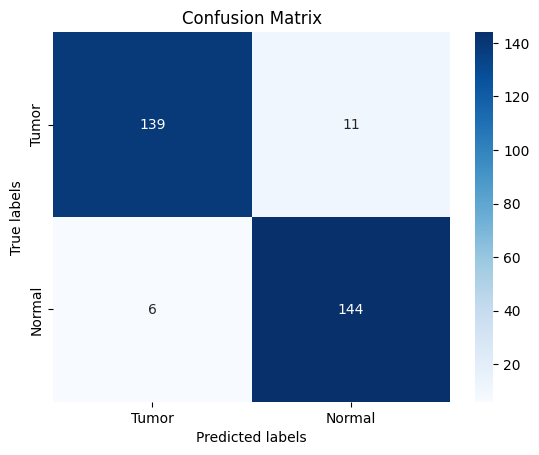

In [51]:
plot_confusion_matrix(rfc, X_test, Y_test)

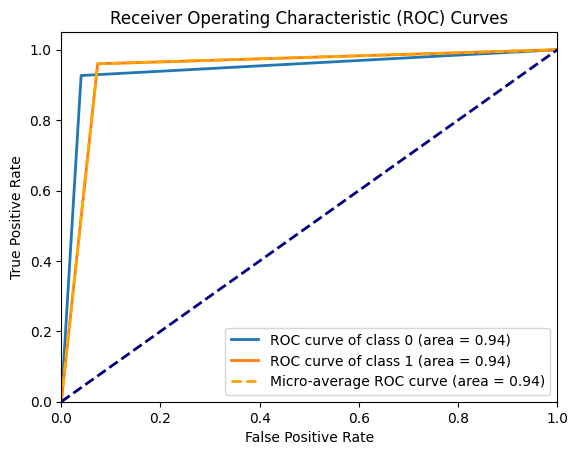

In [52]:
plot_roc_curves(rfc, X_test, Y_test)

In [91]:
# Modeli kaydetme
joblib.dump(rfc, 'rfc.pkl')

# Modeli yükleme
#rfc = joblib.load('rfc.pkl')

['rfc.pkl']

## 4. Classifier: Support Vector Machine 🚀

Support Vector Machine (SVM), sınıflandırma ve regresyon problemleri için kullanılan güçlü bir makine öğrenimi algoritmasıdır. Temel olarak, SVM bir hiperdüzlem kullanarak veri noktalarını sınıflandırır veya regresyon yapar. Sınıflandırma için, SVM, iki sınıf arasında en geniş marjı olan hiperdüzlemi bulmayı hedefler. Bu marj, sınıflar arasındaki en yakın veri noktaları (destek vektörler) arasındaki mesafeye dayanır. Regresyon problemlerinde ise, SVM, belirli bir marj içinde mümkün olduğunca çok veri noktasını içerecek şekilde bir hiperdüzlem oluşturur. SVM'nin avantajları arasında yüksek boyutlu özellik uzaylarında etkili çalışabilme, sınıflandırma veya regresyon problemlerinde yüksek doğruluk sağlama, aşırı uyumu (overfitting) önleme yeteneği ve çekirdek fonksiyonları kullanarak doğrusal olmayan ilişkileri modelleme kabiliyeti bulunur. Ancak, SVM'nin eğitim süresi büyük veri kümelerinde ve yüksek boyutlu özellik uzaylarında artabilir.

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

### Sonuçlar

Destek Vektör Makineleri algoritması, tıbbi veri sınıflandırmasında RBF çekirdeği kullanılarak değerlendirilmiştir. Model, %94.74 ortalama çapraz doğrulama doğruluğu ile test verisinde %94 doğruluk, %93.99 F1 skoru ve %94 ROC eğrisi altındaki alan (AUC) değeri elde etmiştir. Tumor sınıfında %93 hassasiyet ve %95 duyarlılık, Normal sınıfında %95 hassasiyet ve %93 duyarlılık ile dengeli bir performans göstermiştir. Yanlış sınıflandırmalarda Tumor sınıfında 7 ve Normal sınıfında 11 hata yapılmıştır. Bu sonuçlar, SVM algoritmasının yüksek doğruluk oranı ve düşük hata payı ile tıbbi veri analizinde güvenilir bir araç olduğunu kanıtlamaktadır. 

---

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# SVC nesnesini oluşturma ve tüm parametreleri belirleme
svc = SVC(kernel='rbf', C=1.0, gamma='scale')

# Cross-validation işlemi için k-kat sayısını belirleme (örneğin k=5)
k = 5

# Cross-validation ile modelin performansını değerlendirme
cv_scores = cross_val_score(svc, X_train, Y_train, cv=k)

# Elde edilen cross-validation skorlarını yazdırma
print("Cross-validation skorları:", cv_scores)

# Ortalama cross-validation skorunu hesaplama
mean_cv_score = cv_scores.mean()
print("Ortalama cross-validation skoru:", mean_cv_score)

# Modele eğitmek için X_train ve y_train'i vererek eğitimi başlatma
svc.fit(X_train, Y_train)

# Test verisi üzerinde tahmin yapma
y_pred = svc.predict(X_test)

# Test metriklerini hesaplama ve yazdırma
print('Test accuracy: ', accuracy_score(Y_test, y_pred))
print('f1-score: ', f1_score(Y_test, y_pred, average='weighted'))
print('recall: ', recall_score(Y_test, y_pred, average='weighted'))
print('precision: ', precision_score(Y_test, y_pred, average='weighted'))


Cross-validation skorları: [0.96111111 0.95740741 0.92407407 0.94444444 0.95      ]
Ortalama cross-validation skoru: 0.9474074074074075
Test accuracy:  0.94
f1-score:  0.9399893314366998
recall:  0.94
precision:  0.9403131115459883


In [70]:
print_classification_report(svc, X_test, Y_test)

              precision    recall  f1-score   support

       Tumor       0.93      0.95      0.94       150
      Normal       0.95      0.93      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



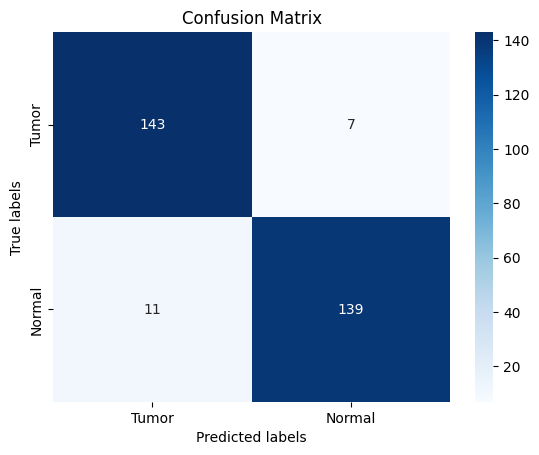

In [71]:
plot_confusion_matrix(svc, X_test, Y_test)

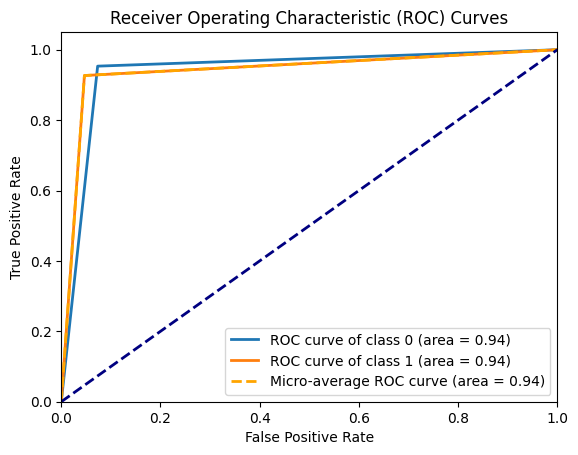

In [72]:
plot_roc_curves(svc, X_test, Y_test)

In [92]:
# Modeli kaydetme
joblib.dump(svc, 'svc.pkl')

# Modeli yükleme
#svc = joblib.load('svc.pkl')

['svc.pkl']

## 5. Classifier: Gradient Boosting 🚀

Gradient Boosting, zayıf öğrenicileri (genellikle karar ağaçları) bir araya getirerek güçlü bir öğrenici oluşturan bir ensemble öğrenme tekniğidir. Temel amacı, hata fonksiyonunu (loss function) azaltarak iteratif olarak öğrenme sürecini iyileştirmektir. Her iterasyonda, mevcut modelin tahminlerinden gelen gradyanı kullanarak yeni bir zayıf öğrenici oluşturulur. Bu öğreniciler, önceki modellerin hatalarını düzeltmeye çalışarak sistemli bir şekilde iyileştirilir. Gradient Boosting'in avantajları arasında yüksek doğruluk, doğrusal olmayan ilişkileri modelleme yeteneği, çeşitli hata fonksiyonlarına uygun olması ve esnek parametre ayarları bulunur.

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

### Sonuçlar

Gradient Boosting algoritması, tıbbi veri sınıflandırmasında etkin bir performans sergilemiştir. Model, %94.37 ortalama çapraz doğrulama doğruluğu elde ederken, test verisinde %93 doğruluk, %93.66 F1 skoru ve %94 AUC değeri kaydedilmiştir. Tumor sınıfı için %93 hassasiyet ve %94 duyarlılık, Normal sınıfı için %94 hassasiyet ve %93 duyarlılık ile, model her iki sınıfta da dengeli ve yüksek bir performans göstermiştir. Karmaşıklık matrisinde, Tumor sınıfında 9, Normal sınıfında ise 10 yanlış tahmin yapılmıştır. Bu sonuçlar, GBC algoritmasının, klinik karar destek sistemlerinde güvenilir bir sınıflandırma aracı olarak kullanılabileceğini ortaya koymaktadır. Modelin güçlü performansı, özellikle her iki sınıfta da dengeli tahmin yeteneği ile dikkat çekmekte olup, gelecekteki çalışmalarda daha da iyileştirilebilir.

---

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#GradientBoostingClassifier nesnesini oluşturma ve tüm parametreleri belirleme
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3)

#Cross-validation işlemi için k-kat sayısını belirleme (örneğin k=5)
k = 5

#Cross-validation ile modelin performansını değerlendirme
cv_scores = cross_val_score(gb, X_train, Y_train, cv=k)

#Elde edilen cross-validation skorlarını yazdırma
print("Cross-validation skorları:", cv_scores)

#Ortalama cross-validation skorunu hesaplama
mean_cv_score = cv_scores.mean()
print("Ortalama cross-validation skoru:", mean_cv_score)

#Modele eğitmek için X_train ve y_train'i vererek eğitimi başlatma
gb.fit(X_train, Y_train)

#Test verisi üzerinde tahmin yapma
y_pred = gb.predict(X_test)

#Test metriklerini hesaplama ve yazdırma
print('Test accuracy: ', accuracy_score(Y_test, y_pred))
print('f1-score: ', f1_score(Y_test, y_pred, average='weighted'))
print('recall: ', recall_score(Y_test, y_pred, average='weighted'))
print('precision: ', precision_score(Y_test, y_pred, average='weighted'))

Cross-validation skorları: [0.9462963  0.95925926 0.91296296 0.94259259 0.95740741]
Ortalama cross-validation skoru: 0.9437037037037037
Test accuracy:  0.9366666666666666
f1-score:  0.9366659629551439
recall:  0.9366666666666666
precision:  0.9366860749366638


In [13]:
print_classification_report(gb, X_test, Y_test)

              precision    recall  f1-score   support

       Tumor       0.93      0.94      0.94       150
      Normal       0.94      0.93      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



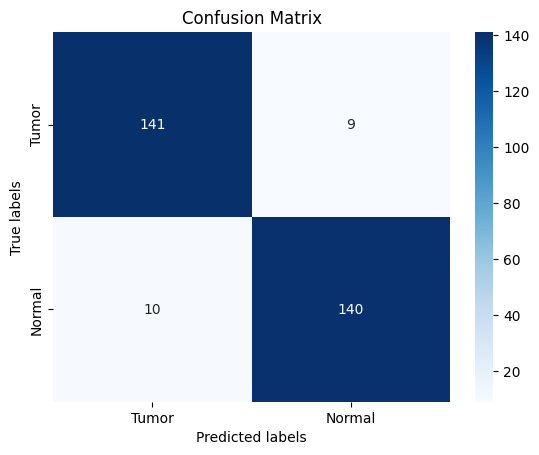

In [14]:
plot_confusion_matrix(gb, X_test, Y_test)

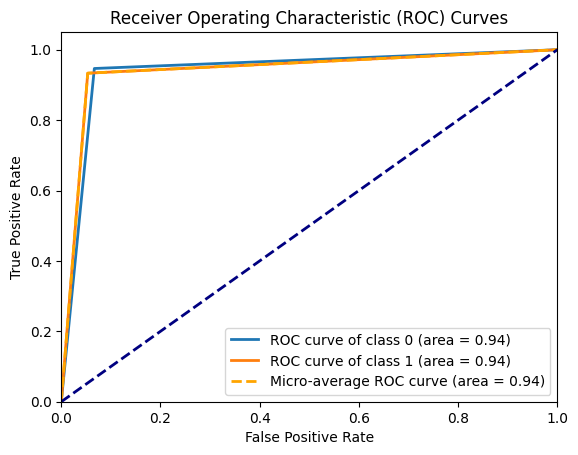

In [76]:
plot_roc_curves(gb, X_test, Y_test)

In [93]:
# Modeli kaydetme
joblib.dump(gb, 'gb.pkl')

# Modeli yükleme
#gb = joblib.load('gb.pkl')

['gb.pkl']

## 6. Classifier: Logistic Regression 🚀

Logistic Regression (Lojistik Regresyon), sınıflandırma problemleri için kullanılan bir lineer modeldir. Temel olarak, bağımlı değişkenin kategorik olduğu durumlarda (genellikle ikili sınıflandırmada) kullanılır. Lojistik regresyon, girdi özelliklerinin ağırlıklı toplamını alır ve bu toplamı lojistik (sigmoid) fonksiyonuna sokarak her bir veri noktasının sınıf olasılığını tahmin eder. Bu sayede, sınıflandırma için olasılık tabanlı bir yaklaşım sunar ve sınıflar arasında doğrusal olmayan sınırlamaları da modele entegre edebilir. Lojistik regresyonun avantajları arasında basitlik, yorumlanabilirlik, hızlı eğitim süresi ve düşük hesaplama maliyeti bulunur. Ancak, doğrusal sınırlamalar altında çalıştığı için karmaşık ilişkileri modelleme yeteneği sınırlıdır ve özellikle çok sayıda özellik veya yüksek boyutlu veri setleriyle başa çıkmakta zorlanabilir.

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

### Sonuçlar

Logistic Regression algoritması, tıbbi veri sınıflandırmasında etkin bir performans sergilemiştir. Beş katlı cross-validation sonucunda elde edilen ortalama doğruluk oranı %96.59 olarak belirlenmiş ve test veri setinde %98 doğruluk elde edilmiştir. F1-score, recall ve precision metrikleri de sırasıyla %98, %98 ve %98 civarında yüksek değerler göstermiştir. Ayrıca AUC değeri %98 olarak hesaplanmıştır. Sınıflandırma raporuna göre, Tumor ve Normal sınıfları için yüksek hassasiyet, geri çağırma ve F1-score değerleri elde edilmiştir. Karmaşıklık matrisi incelendiğinde, Tumor sınıfında 2 yanlış tahmin ve Normal sınıfında 4 yanlış tahmin yapıldığı gözlemlenmiştir. Bu sonuçlar, modelin beyin tümörü teşhisi konusunda potansiyel klinik uygulamalar için umut verici bir araç olabileceğini göstermektedir.

---

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# LogisticRegression nesnesini oluşturma ve tüm parametreleri belirleme
lr = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')

# Cross-validation işlemi için k-kat sayısını belirleme (örneğin k=5)
k = 5

# Cross-validation ile modelin performansını değerlendirme
cv_scores = cross_val_score(lr, X_train, Y_train, cv=k)

# Elde edilen cross-validation skorlarını yazdırma
print("Cross-validation skorları:", cv_scores)

# Ortalama cross-validation skorunu hesaplama
mean_cv_score = cv_scores.mean()
print("Ortalama cross-validation skoru:", mean_cv_score)

# Modele eğitmek için X_train ve y_train'i vererek eğitimi başlatma
lr.fit(X_train, Y_train)

# Test verisi üzerinde tahmin yapma
y_pred = lr.predict(X_test)

# Test metriklerini hesaplama ve yazdırma
print('Test accuracy: ', accuracy_score(Y_test, y_pred))
print('f1-score: ', f1_score(Y_test, y_pred, average='weighted'))
print('recall: ', recall_score(Y_test, y_pred, average='weighted'))
print('precision: ', precision_score(Y_test, y_pred, average='weighted'))


Cross-validation skorları: [0.97037037 0.97222222 0.95555556 0.96666667 0.96481481]
Ortalama cross-validation skoru: 0.965925925925926
Test accuracy:  0.98
f1-score:  0.9799991110716032
recall:  0.98
precision:  0.980085348506401


In [78]:
print_classification_report(lr, X_test, Y_test)

              precision    recall  f1-score   support

       Tumor       0.97      0.99      0.98       150
      Normal       0.99      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



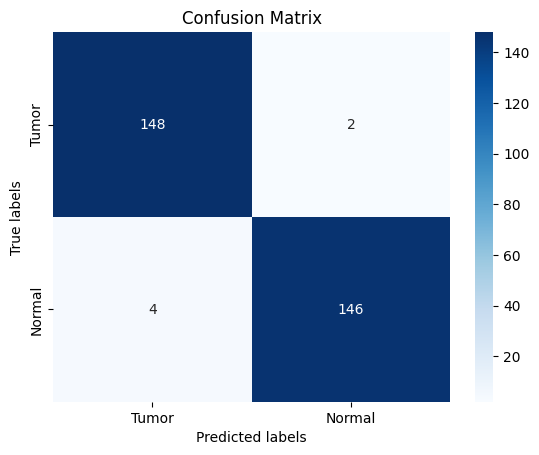

In [79]:
plot_confusion_matrix(lr, X_test, Y_test)

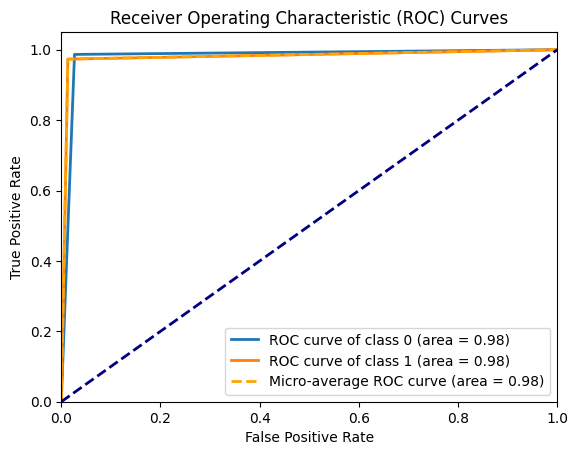

In [80]:
plot_roc_curves(lr, X_test, Y_test)

In [94]:
# Modeli kaydetme
joblib.dump(lr, 'lr.pkl')

# Modeli yükleme
#lr = joblib.load('lr.pkl')

['lr.pkl']

# 📌
Makine Öğrenmesinde kullanılan verilerle boyut farkından dolayı hata almamak için Yapay Sinir Ağları ve Evrişimli Sinir Ağları için sınıflandırma raporu, karmaşıklık matrisi ve roc eğrisi metrikleri yeniden tanımlandı. 

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

def cls_report(model, test_data, test_label):
    # Modelin tahminlerini yapma
    y_score = model.predict(test_data)
    
    # Sınıf isimleri
    class_names = ['Tumor', 'Normal']
    
    # Classification report hesaplama
    result = classification_report(test_label.argmax(axis=1), y_score.argmax(axis=1), target_names=class_names)
    
    # Confusion matrix hesaplama
    conf_mat = confusion_matrix(test_label.argmax(axis=1), y_score.argmax(axis=1))
    
    # Sonuçları ve confusion matrix'i ekrana yazdırma
    print("Classification Report".center(56))
    print("-"*56)
    print(result)
    print("-"*56)
    
    return result, conf_mat

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def confusion(model, test_data, test_label):
    # Modelin tahminlerini yapma
    y_score = model.predict(test_data)
    
    # Sınıf isimleri
    class_names = ['Tumor', 'Normal']
    
    # Confusion matrix hesaplama
    conf_mat = confusion_matrix(test_label.argmax(axis=1), y_score.argmax(axis=1))

    # ConfusionMatrixDisplay objesini oluşturma
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_names)
    
    # Confusion matrix'i görselleştirme
    disp.plot(cmap='summer')
    
    # Görsel başlığını ayarlama
    plt.title("Confusion Matrix")
    
    # Görseli ekrana getirme
    plt.show()

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, model):
    # Modelin tahminlerini yapma
    y_score = model.predict(x_test)
    
    # False Positive Rate (FPR), True Positive Rate (TPR) ve ROC alanlarını hesaplamak için boş sözlükler oluşturma
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Her bir sınıf için ROC eğrisini ve alanını hesaplama
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average için ROC eğrisini ve alanını hesaplama
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # ROC eğrisini çizme
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
    for i in range(2):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    # Rasgele tahmin eğrisini çizme
    plt.plot([0, 1], [0, 1], 'k--')
    
    # Eksenleri ve başlığı ayarlama
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    
    # Açıklamayı ekleme
    plt.legend(loc="lower right")
    
    # ROC eğrisini gösterme
    plt.show()

In [17]:
from sklearn.model_selection import KFold
# 5 katlı çapraz doğrulama (cross-validation) için KFold oluşturma
kfold = KFold(n_splits=5, shuffle=True)
# Sonuçların kaydedileceği dizin yolu
path = r"C:\Users\tubitak\Desktop\BrainT\dataset"

# YAPAY SİNİR AĞI


Bu model, 224x224 piksel boyutundaki renkli görüntüler üzerinde sınıflandırma yapmak amacıyla oluşturulmuş bir yapay sinir ağıdır. Giriş katmanı olan Flatten, görüntü verilerini düzleştirerek tek boyutlu bir vektöre dönüştürür. Ardından gelen gizli katman (Dense), 512 nöron içerir ve ReLU aktivasyon fonksiyonuyla donatılmıştır; bu katman, veri setindeki karmaşıklığı öğrenmek ve temsil etmek için kullanılır. Son katman olan Dense(2, activation='softmax'), iki sınıf için softmax aktivasyon fonksiyonu kullanarak sınıf olasılıklarını tahmin eder. Modelin parametre sayısı, eğitim sürecinde öğrenilen ağırlıklar ve bias terimlerinin toplamını ifade eder.

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

### Sonuçlar

Beyin tümörü teşhisi için geliştirilen sinir ağı modelinin beş katlı çapraz doğrulama ile başarılı bir şekilde eğitimini ve değerlendirmesini sunulmaktadır. Elde edilen yüksek test doğruluğu (%97.33), hassasiyet ve geri çağırma değerleri (%97.33), ve AUC değeri (%0.99), modelin güçlü performansını göstermektedir. Sınıflandırma raporuna göre, tümör ve normal beyin dokusu sınıflarında yüksek hassasiyet ve geri çağırma değerleri elde edilmiş olup, karmaşıklık matrisi incelendiğinde tumor sınıfından 1 ve normal sınıfından 7 yanlış tahmin görülmektedir. 

---

In [18]:
ysa = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224,3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')])
ysa.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               77070848  
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 77,071,874
Trainable params: 77,071,874
Non-trainable params: 0
_________________________________________________________________


----------------------------------------------------------------------------------------------------
1. Fold Eğitiliyor...
Epoch 1/20
540/540 [==============================] - 6s 10ms/step - loss: 8.4789 - accuracy: 0.7250 - precision: 0.7250 - recall: 0.7250 - auc: 0.7466 - val_loss: 0.9467 - val_accuracy: 0.8593 - val_precision: 0.8593 - val_recall: 0.8593 - val_auc: 0.9099 - lr: 0.0010
Epoch 2/20
540/540 [==============================] - 5s 10ms/step - loss: 1.3682 - accuracy: 0.8144 - precision: 0.8144 - recall: 0.8144 - auc: 0.8604 - val_loss: 0.7581 - val_accuracy: 0.8519 - val_precision: 0.8519 - val_recall: 0.8519 - val_auc: 0.9215 - lr: 0.0010
Epoch 3/20
540/540 [==============================] - 5s 9ms/step - loss: 0.3345 - accuracy: 0.9037 - precision: 0.9037 - recall: 0.9037 - auc: 0.9575 - val_loss: 0.4561 - val_accuracy: 0.8537 - val_precision: 0.8537 - val_recall: 0.8537 - val_auc: 0.9305 - lr: 0.0010
Epoch 4/20
540/540 [==============================] - 5s 9ms/step - 

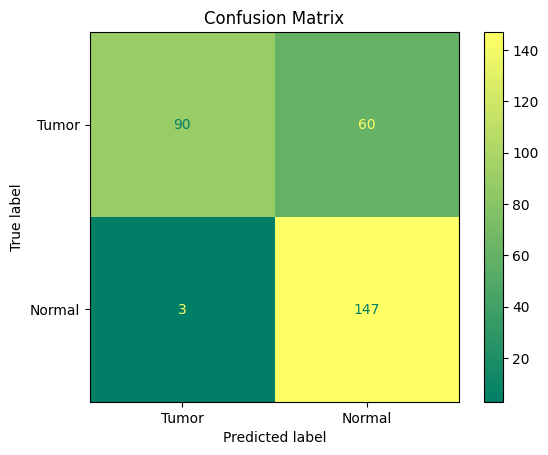

10/10 [==============================] - 0s 5ms/step


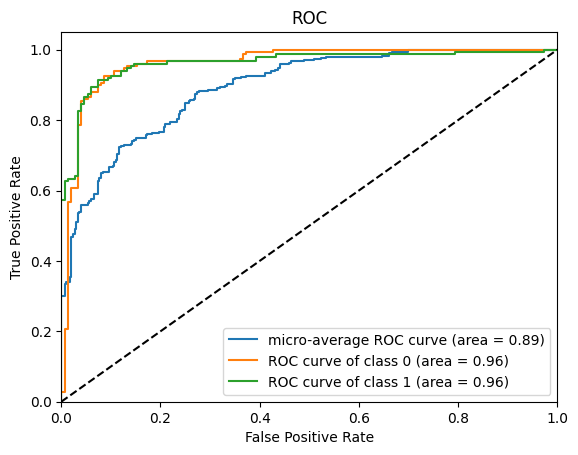

Doğruluk:  79.00000214576721
Kayıp:     0.6208856701850891
----------------------------------------------------------------------------------------------------
2. Fold Eğitiliyor...
Epoch 1/20
540/540 [==============================] - 6s 10ms/step - loss: 8.7144 - accuracy: 0.7310 - precision: 0.7310 - recall: 0.7310 - auc: 0.7523 - val_loss: 3.9627 - val_accuracy: 0.7093 - val_precision: 0.7093 - val_recall: 0.7093 - val_auc: 0.7303 - lr: 0.0010
Epoch 2/20
540/540 [==============================] - 5s 9ms/step - loss: 1.3614 - accuracy: 0.8463 - precision: 0.8463 - recall: 0.8463 - auc: 0.8894 - val_loss: 1.4006 - val_accuracy: 0.7574 - val_precision: 0.7574 - val_recall: 0.7574 - val_auc: 0.8331 - lr: 0.0010
Epoch 3/20
540/540 [==============================] - 5s 9ms/step - loss: 0.4190 - accuracy: 0.8977 - precision: 0.8977 - recall: 0.8977 - auc: 0.9531 - val_loss: 0.2156 - val_accuracy: 0.9444 - val_precision: 0.9444 - val_recall: 0.9444 - val_auc: 0.9770 - lr: 0.0010
Epoch 4/20

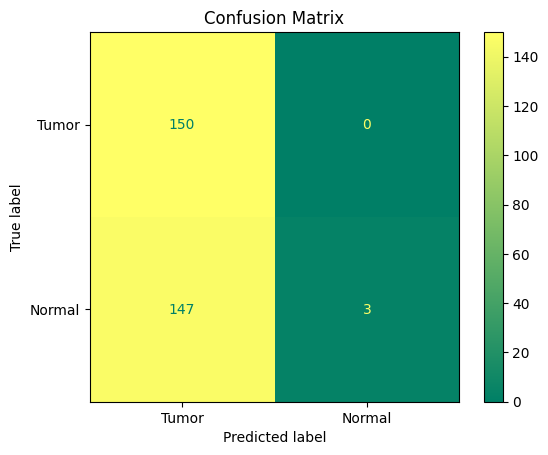

10/10 [==============================] - 0s 5ms/step


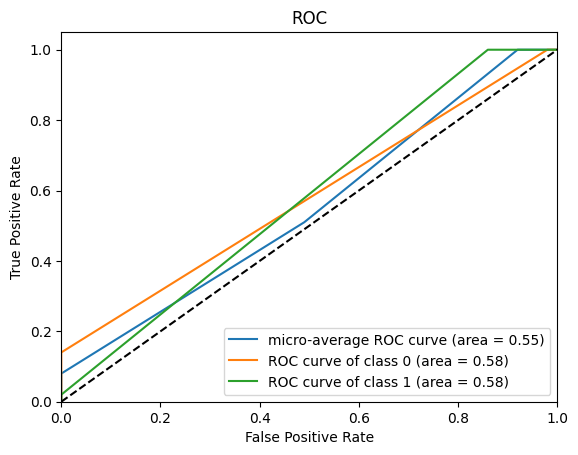

Doğruluk:  50.999999046325684
Kayıp:     0.6788313388824463
----------------------------------------------------------------------------------------------------
3. Fold Eğitiliyor...
Epoch 1/20
540/540 [==============================] - 8s 14ms/step - loss: 13.9316 - accuracy: 0.7199 - precision: 0.7199 - recall: 0.7199 - auc: 0.7324 - val_loss: 1.1568 - val_accuracy: 0.8722 - val_precision: 0.8722 - val_recall: 0.8722 - val_auc: 0.9073 - lr: 0.0010
Epoch 2/20
540/540 [==============================] - 5s 10ms/step - loss: 0.5175 - accuracy: 0.8630 - precision: 0.8630 - recall: 0.8630 - auc: 0.9243 - val_loss: 0.3493 - val_accuracy: 0.8981 - val_precision: 0.8981 - val_recall: 0.8981 - val_auc: 0.9465 - lr: 0.0010
Epoch 3/20
540/540 [==============================] - 5s 9ms/step - loss: 0.2014 - accuracy: 0.9231 - precision: 0.9231 - recall: 0.9231 - auc: 0.9752 - val_loss: 0.1798 - val_accuracy: 0.9519 - val_precision: 0.9519 - val_recall: 0.9519 - val_auc: 0.9825 - lr: 0.0010
Epoch 4

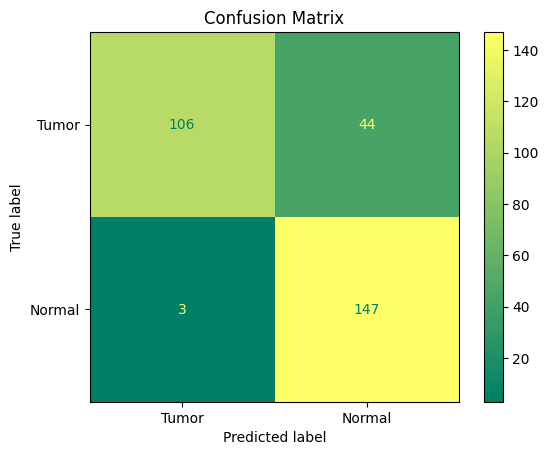

10/10 [==============================] - 0s 8ms/step


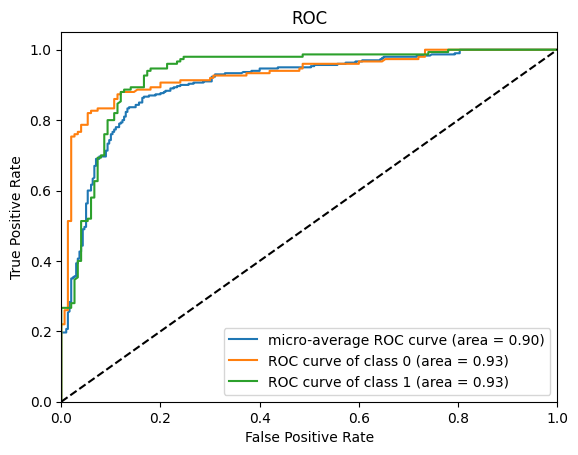

Doğruluk:  84.33333039283752
Kayıp:     0.46787750720977783
----------------------------------------------------------------------------------------------------
4. Fold Eğitiliyor...
Epoch 1/20
540/540 [==============================] - 6s 10ms/step - loss: 10.0058 - accuracy: 0.7333 - precision: 0.7333 - recall: 0.7333 - auc: 0.7468 - val_loss: 0.6481 - val_accuracy: 0.8148 - val_precision: 0.8148 - val_recall: 0.8148 - val_auc: 0.8937 - lr: 0.0010
Epoch 2/20
540/540 [==============================] - 5s 9ms/step - loss: 0.4718 - accuracy: 0.8588 - precision: 0.8588 - recall: 0.8588 - auc: 0.9214 - val_loss: 0.4559 - val_accuracy: 0.8037 - val_precision: 0.8037 - val_recall: 0.8037 - val_auc: 0.8992 - lr: 0.0010
Epoch 3/20
540/540 [==============================] - 5s 10ms/step - loss: 0.2807 - accuracy: 0.8972 - precision: 0.8972 - recall: 0.8972 - auc: 0.9556 - val_loss: 0.3664 - val_accuracy: 0.8870 - val_precision: 0.8870 - val_recall: 0.8870 - val_auc: 0.9252 - lr: 0.0010
Epoch 4

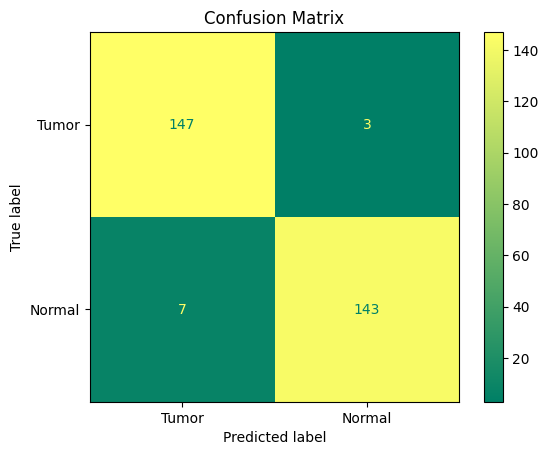

10/10 [==============================] - 0s 5ms/step


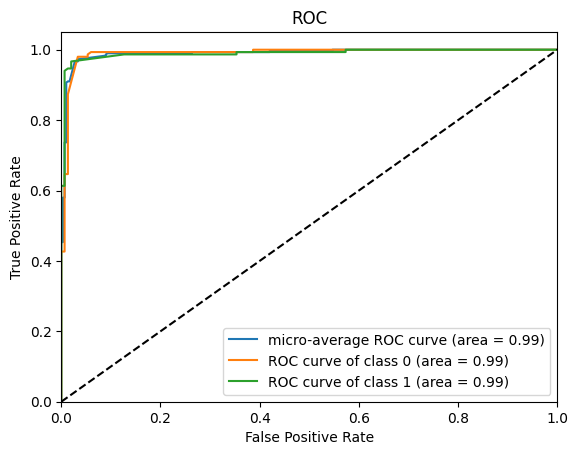

Doğruluk:  96.66666388511658
Kayıp:     0.12044321745634079
----------------------------------------------------------------------------------------------------
5. Fold Eğitiliyor...
Epoch 1/20
540/540 [==============================] - 6s 10ms/step - loss: 6.4563 - accuracy: 0.7139 - precision: 0.7139 - recall: 0.7139 - auc: 0.7419 - val_loss: 6.0644 - val_accuracy: 0.5833 - val_precision: 0.5833 - val_recall: 0.5833 - val_auc: 0.5955 - lr: 0.0010
Epoch 2/20
540/540 [==============================] - 5s 9ms/step - loss: 0.6685 - accuracy: 0.8556 - precision: 0.8556 - recall: 0.8556 - auc: 0.9110 - val_loss: 0.2188 - val_accuracy: 0.9315 - val_precision: 0.9315 - val_recall: 0.9315 - val_auc: 0.9722 - lr: 0.0010
Epoch 3/20
540/540 [==============================] - 5s 8ms/step - loss: 0.2185 - accuracy: 0.9264 - precision: 0.9264 - recall: 0.9264 - auc: 0.9710 - val_loss: 0.2513 - val_accuracy: 0.9074 - val_precision: 0.9074 - val_recall: 0.9074 - val_auc: 0.9662 - lr: 0.0010
Epoch 4/2

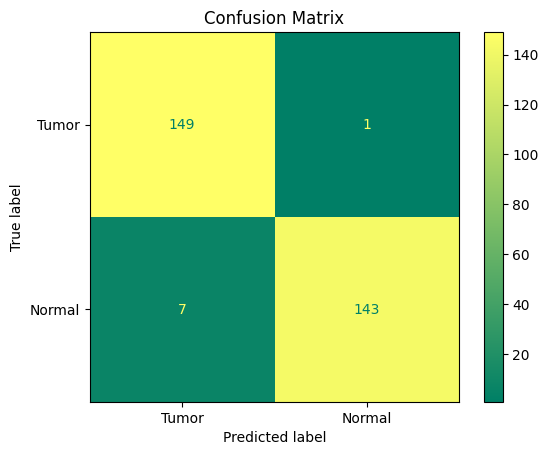

10/10 [==============================] - 0s 5ms/step


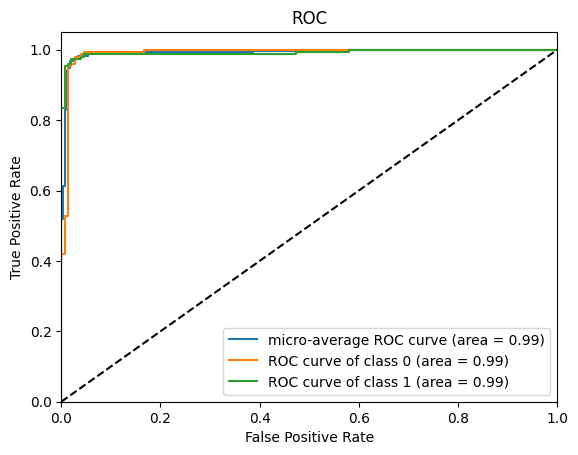

Doğruluk:  97.33333587646484
Kayıp:     0.10785255581140518
Execution Time :  342.38154315948486
****************************************************************************************************


In [20]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import numpy as np
from time import time
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Her katlama için model geçmişi ve skorlarını saklamak için listeler oluşturma
model_history_per_fold = []
per_fold_scores = []

# Başlangıç zamanını kaydetme
start = time()

# Her bir katlamada döngü yapma
fold_no = 1
for train, val in kfold.split(x_train, y_train):
    # Yeni bir Sequential modeli oluşturma
    ysa = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    # Model kontrol noktası için yol oluşturma ve ModelCheckpoint callback'ini tanımlama
    checkpoint_filepath = f'model_fold_{fold_no}.h5'
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='min',
        save_best_only=True
    )

    # Optimizasyon sonuçlarından alınan learning rate değerini belirtme (örnek)
    optimized_learning_rate = 0.004261879524120684  # Örnek olarak, kendi değerinizi ekleme

    # ReduceLROnPlateau callback'ine learning rate'i entegre etme
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1, min_delta=1e-5)
    reduce_lr.learning_rate = optimized_learning_rate  # learning rate'i ayarlama

    # EarlyStopping callback'ini tanımlama
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

    # Callback'leri bir listede toplama
    callbacks = [model_checkpoint_callback, reduce_lr, early_stopping]

    # Modeli derleme
    ysa.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.AUC(name='auc')])

    # Model eğitimini başlatma
    print('-' * 100)
    print(f'{fold_no}. Fold Eğitiliyor...')
    history = ysa.fit(x_train[train], y_train[train],
                      validation_data=(x_train[val], y_train[val]),
                      batch_size=4,
                      epochs=20,
                      callbacks=callbacks,
                      verbose=1)

    # Model eğitimi tamamlandıktan sonra geçmişi kaydetme
    model_history_per_fold.append(history.history)

    print(f'\n{fold_no}. Fold Eğitim Tamamlandı\n')

    # Modeli test etme ve performans metriklerini değerlendirme
    print(f'{fold_no}. Fold Test Ediliyor...')
    scores = ysa.evaluate(x_test, y_test)
    report = cls_report(ysa, x_test, y_test)
    confusion(ysa, x_test, y_test)
    plot_roc_curve(y_test, ysa)

    # Fold'a özgü skorları kaydetme
    per_fold_scores.append(scores)
    print("Doğruluk: ", scores[1] * 100)
    print("Kayıp:    ", scores[0])

    # Bir sonraki katlama için sayaçı artırma
    fold_no += 1

# Eğitim süresini hesaplama
end = time()
execution_time = end - start

# Model geçmişini ve skorlarını numpy dizileri olarak kaydetme
np.save(path+'/ysa_history.npy', np.array(model_history_per_fold))
np.save(path+'/ysa_scores.npy', np.array(per_fold_scores))

# Modeli diskte hdf5 formatında kaydetme
ysa.save(r'C:\Users\tubitak\Desktop\BrainT\dataset\ysa.hdf5')

# Eğitim süresini ve işlemin tamamlandığını bildirme
print("Execution Time : ", execution_time)
print('*' * 100)

In [ ]:
# Eğitilmiş modeli diskten yükleme
ysa = tf.keras.models.load_model(r'C:\Users\tubitak\Desktop\BrainT\dataset\ysa.hdf5')

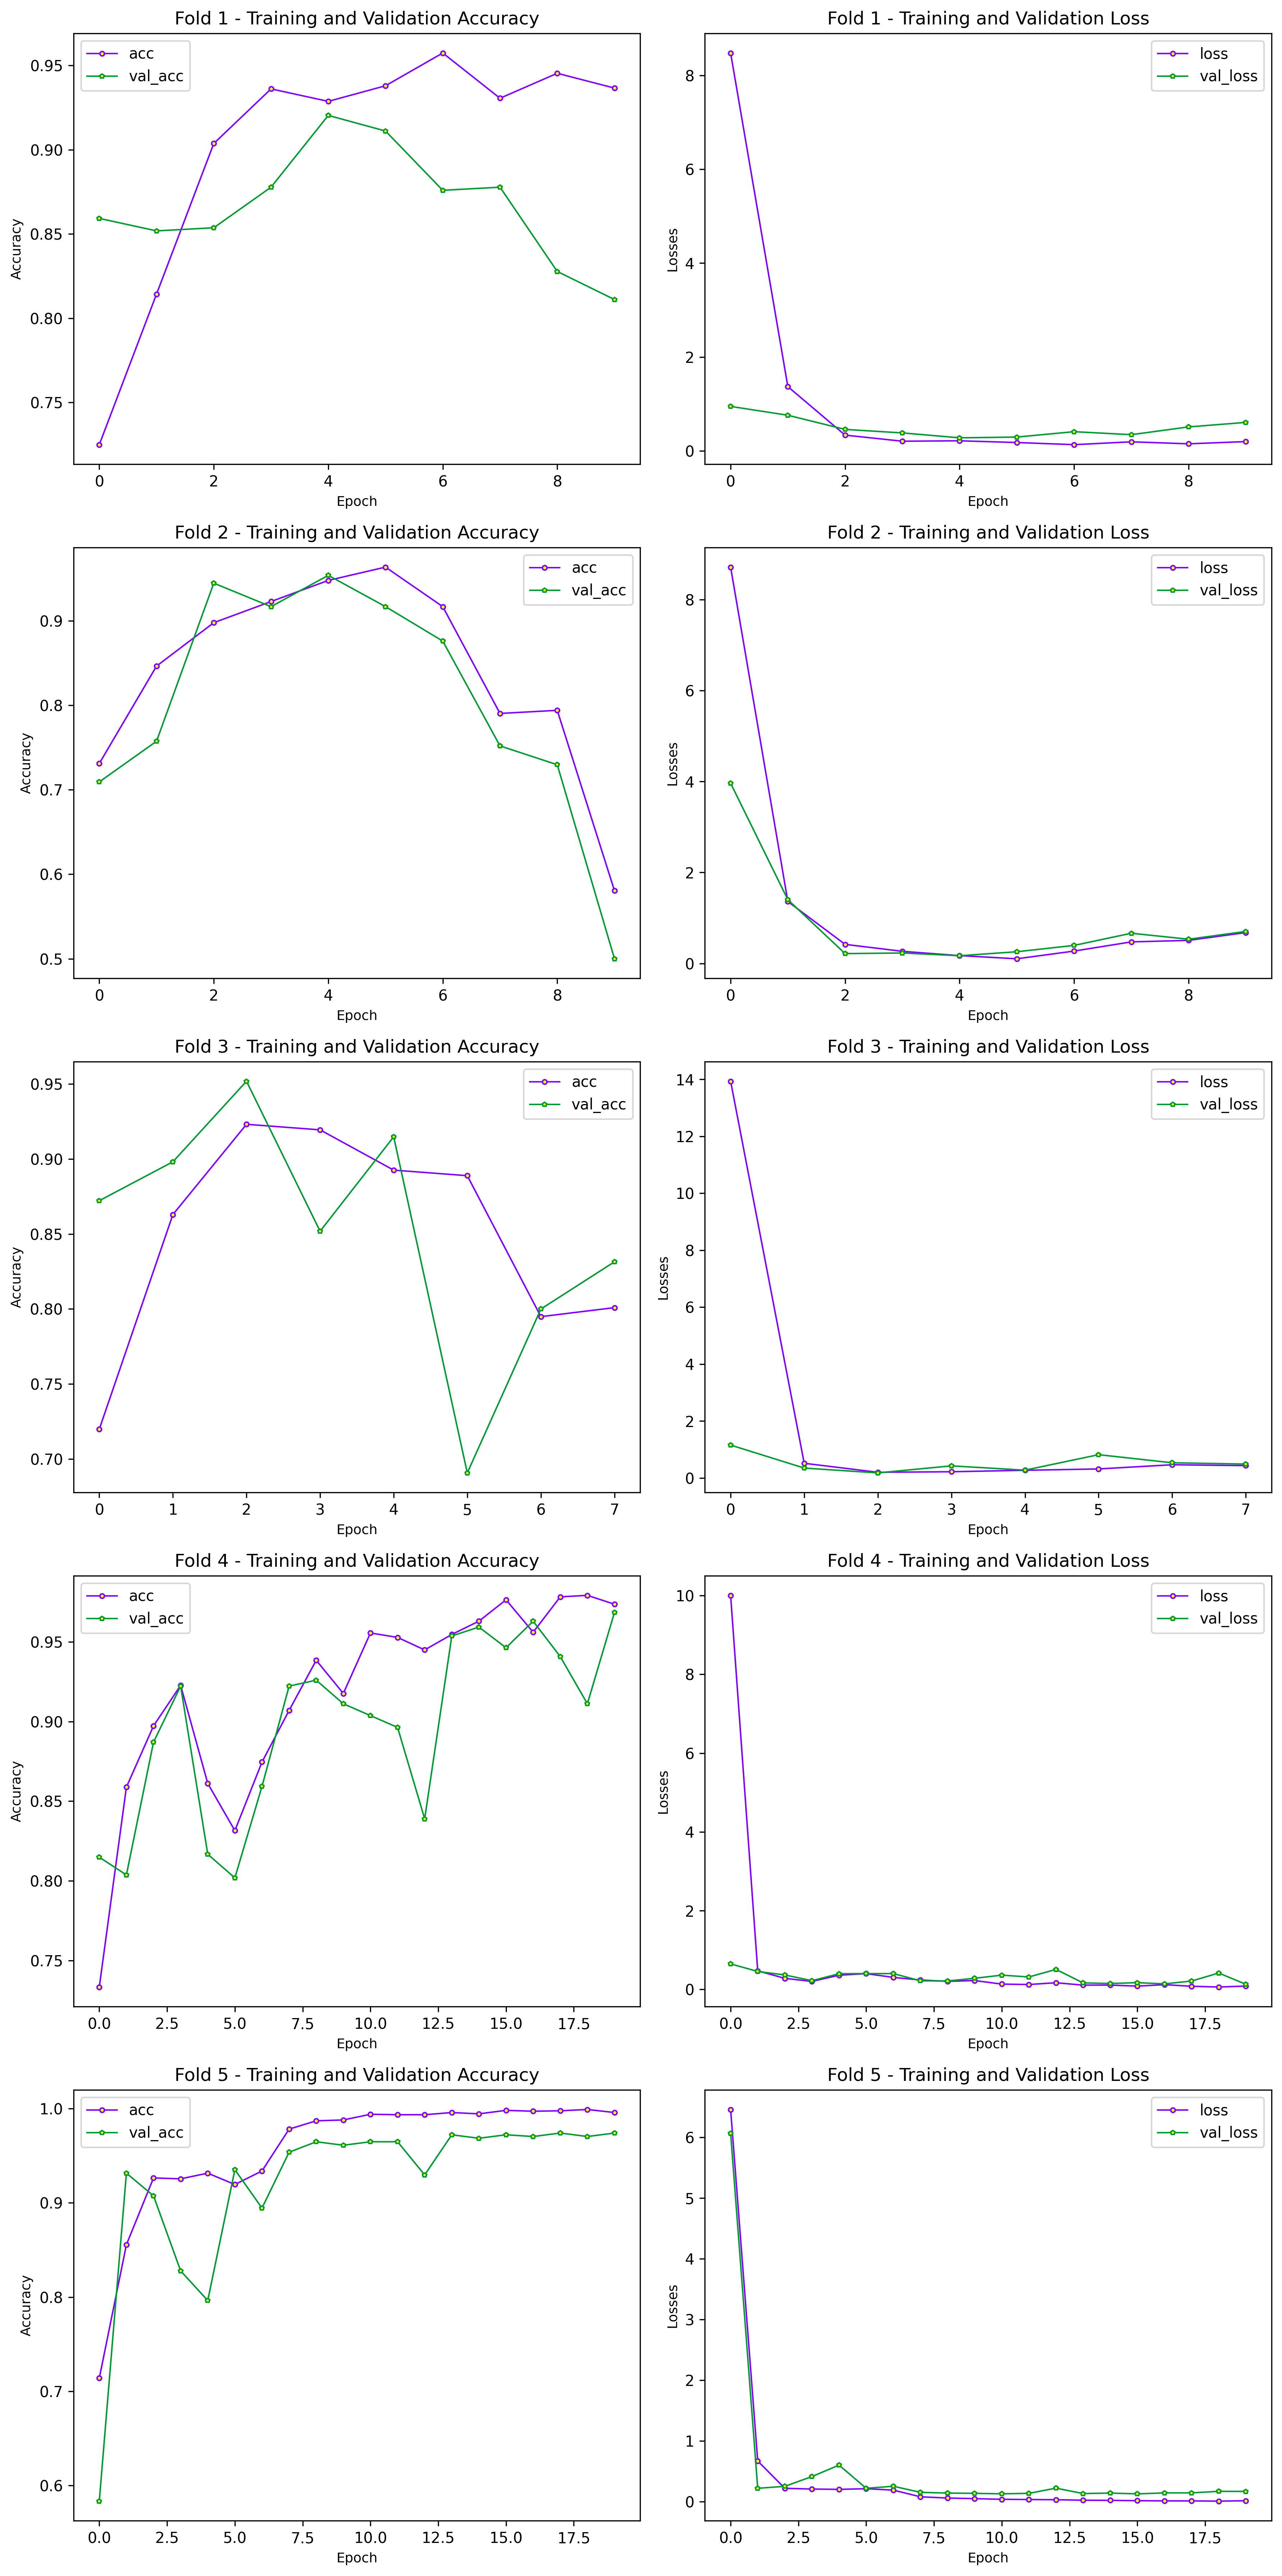

In [23]:
import numpy as np
import matplotlib.pyplot as plt

history = np.load(r'C:\Users\tubitak\Desktop\BrainT\dataset\ysa_history.npy', allow_pickle=True)

plt.figure(figsize=(12, 24), dpi=300)  # Genişlik: 12, Yükseklik: 24 

for i in range(5):
    # fold için tamamlanan epoch sayısını kullanma
    plt.subplot(5, 2, 2*i+1)
    plt.title('{}. Fold Performance'.format(i + 1), fontdict={'size': 10})
    plt.plot(history[i]['accuracy'], label='acc', color='#8000ff', marker='o', ms=3, mfc='#ffff00', linewidth='1')
    plt.plot(history[i]['val_accuracy'], label='val_acc', color='#009933', marker='p', ms=3, mfc='#ffff00', linewidth='1')
    plt.title(f'Fold {i+1} - Training and Validation Accuracy')
    plt.legend()
    plt.xlabel("Epoch", fontdict={'size': 9})
    plt.ylabel("Accuracy", fontdict={'size': 9})
    
    plt.subplot(5, 2, 2*i+2)
    plt.plot(history[i]['loss'], label='loss', color='#8000ff', marker='o', ms=3, mfc='#ffff00', linewidth='1')
    plt.plot(history[i]['val_loss'], label='val_loss', color='#009933', marker='p', ms=3, mfc='#ffff00', linewidth='1')
    plt.title(f'Fold {i+1} - Training and Validation Loss')
    plt.legend()
    plt.xlabel("Epoch", fontdict={'size': 9})
    plt.ylabel("Losses", fontdict={'size': 9})

plt.tight_layout()  # Adjust layout to make room for titles and labels
plt.savefig('ysa.png')  # Save the figure
plt.show()


1/1 [==============================] - 0s 14ms/step


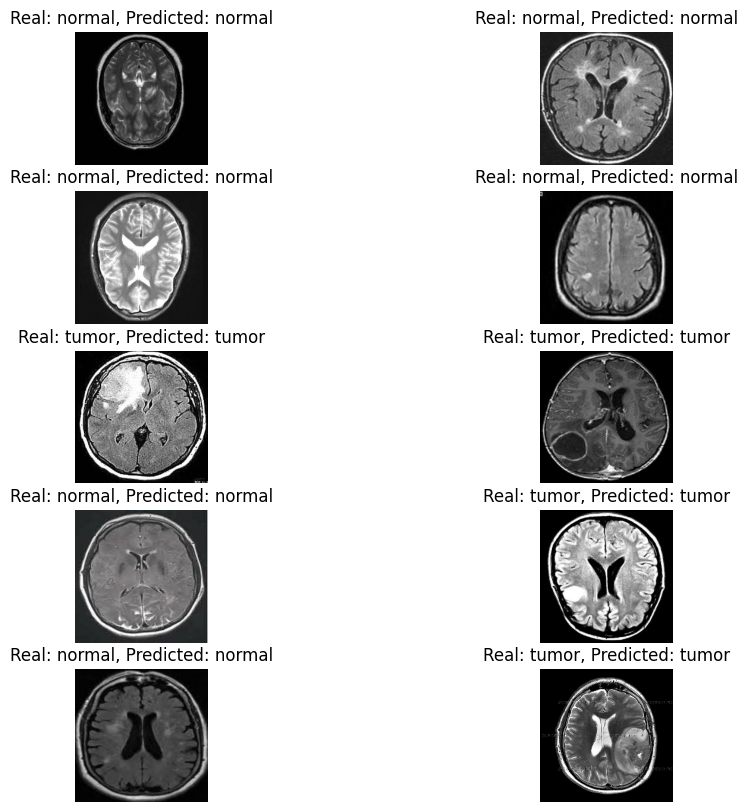

In [24]:
python
Kodu kopyala
import numpy as np
import matplotlib.pyplot as plt

# Test veri kümesinden rastgele 10 örnek seçme
random_indices = np.random.choice(len(x_test), size=10, replace=False)
random_images = x_test[random_indices]
random_labels = y_test[random_indices]

# Seçilen örnekler için modelden tahminler yapma
predictions = ysa.predict(random_images)

# Tahminler ve gerçek etiketlerle birlikte görüntüleri görselleştirme
plt.figure(figsize=(11, 10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(random_images[i])  # Görüntüyü çizme
    # Gerçek ve tahmin edilen etiketleri belirtme
    real_label = "tumor" if random_labels[i][1] == 1 else "normal"
    predicted_label = "tumor" if np.argmax(predictions[i]) == 1 else "normal"
    plt.title(f'Real: {real_label}, Predicted: {predicted_label}')
    plt.axis('off')  # Eksenleri kapatma
plt.show()  # Görüntüleri gösterme

## Model: Proposed CNN

Bu model, 224x224 piksel boyutundaki renkli görüntüler üzerinde sınıflandırma yapmak üzere tasarlanmış bir evrişimli sinir ağıdır (CNN). İlk olarak, görüntü verilerini işlemek üzere Conv2D katmanıyla başlar. Ardından, her Conv2D katmanından sonra aktivasyon fonksiyonu olarak ReLU kullanılarak görüntü özelliklerinin çıkarılması devam eder. Her Conv2D katmanının ardından MaxPooling2D katmanı gelir, bu katmanlar görüntü boyutunu azaltırken önemli özellikleri korur.

Model, daha sonra BatchNormalization katmanlarıyla normalizasyon yapar, bu da eğitim sürecini stabilize eder ve daha hızlı öğrenme sağlar. Dropout katmanları (Dropout(0.15)) kullanılarak aşırı öğrenmeyi azaltır, yani modelin genelleştirilmesine yardımcı olur. Son Conv2D katmanıyla özellik haritaları oluşturulur ve Flatten katmanıyla bu özellik haritaları düzleştirilerek bir vektör haline getirilir.

Dense katmanları (Fully Connected) ile özellik vektörleri işlenir, bu katmanlar özellik vektörünün karmaşıklığını artırır ve sınıflandırma için hazırlar. Son olarak, softmax aktivasyon fonksiyonu ile iki sınıf arasında olasılıklar elde edilir.

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

### Sonuçlar

Beyin tümörü teşhisi için geliştirilen Convolutional Neural Network (CNN) modelinin beş katlı çapraz doğrulama ile değerlendirilmesi incelenmiştir. Her bir kat için eğitilen model, çeşitli evrişim ve havuzlama katmanlarıyla kompleks bir yapıya sahiptir. Eğitim sürecinde elde edilen sonuçlar, yüksek doğruluk (%98.00 test doğruluğu), hassasiyet ve geri çağırma değerleri (%98.00), ve AUC değeri (%0.9872) ile modelin güçlü performansını ortaya koymaktadır. Sınıflandırma raporuna göre, Tumor ve Normal sınıflarında yüksek hassasiyet ve geri çağırma değerleri elde edilmiştir. Ancak karmaşıklık matrisi incelendiğinde, Tumor sınıfında 2 yanlış tahmin ve Normal sınıfında 4 yanlış tahmin yapıldığı görülmektedir. Bu bulgular, modelin beyin tümörü teşhisi için etkili bir araç olabileceğini ve klinik uygulamalarda kullanım potansiyeline sahip olduğunu göstermektedir.

---

In [25]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu',padding = 'Same', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(16, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(32, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 8)       584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 8)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 8)        32        
 ormalization)                                                   
                                                     

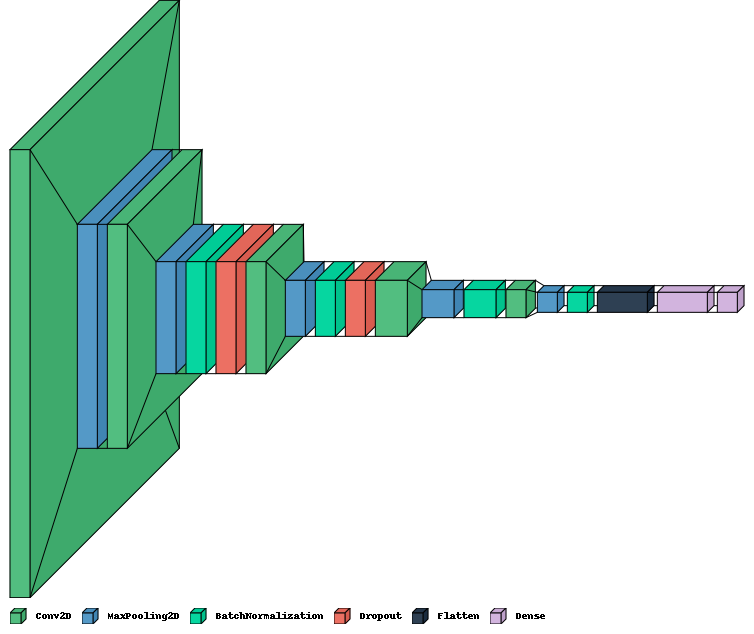

In [26]:
python
Kodu kopyala
# TensorFlow Keras ve gerekli katmanlarını içe aktarma
from tensorflow.keras import layers

# visualkeras ve collections modüllerini içe aktarma
import visualkeras
from collections import defaultdict

# Her bir katman türü için bir renk haritası oluşturma
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#52BE80'         # Conv2D katmanları için yeşil renk
color_map[layers.MaxPooling2D]['fill'] = '#5499C7'   # MaxPooling2D katmanları için mavi renk
color_map[layers.Dropout]['fill'] = '#EC7063'        # Dropout katmanları için kırmızı renk
color_map[layers.Dense]['fill'] = '#D2B4DE'          # Dense (Fully Connected) katmanları için mor renk
color_map[layers.Flatten]['fill'] = '#2E4053'        # Flatten katmanları için lacivert renk

# Modelin katmanlarını görselleştirin ve renk haritasını uygulama
visualkeras.layered_view(model, legend=True, scale_xy=2, scale_z=1, max_z=50, color_map=color_map)

----------------------------------------------------------------------------------------------------
1. Fold Eğitiliyor...
Epoch 1/20
270/270 [==============================] - 7s 11ms/step - loss: 0.4802 - accuracy: 0.8014 - precision: 0.8014 - recall: 0.8014 - auc: 0.8733 - val_loss: 0.6071 - val_accuracy: 0.6370 - val_precision: 0.6370 - val_recall: 0.6370 - val_auc: 0.7289 - lr: 0.0010
Epoch 2/20
270/270 [==============================] - 3s 10ms/step - loss: 0.2747 - accuracy: 0.8806 - precision: 0.8806 - recall: 0.8806 - auc: 0.9540 - val_loss: 0.1661 - val_accuracy: 0.9389 - val_precision: 0.9389 - val_recall: 0.9389 - val_auc: 0.9858 - lr: 0.0010
Epoch 3/20
270/270 [==============================] - 3s 10ms/step - loss: 0.1710 - accuracy: 0.9324 - precision: 0.9324 - recall: 0.9324 - auc: 0.9819 - val_loss: 0.2992 - val_accuracy: 0.8796 - val_precision: 0.8796 - val_recall: 0.8796 - val_auc: 0.9556 - lr: 0.0010
Epoch 4/20
270/270 [==============================] - 3s 10ms/step 

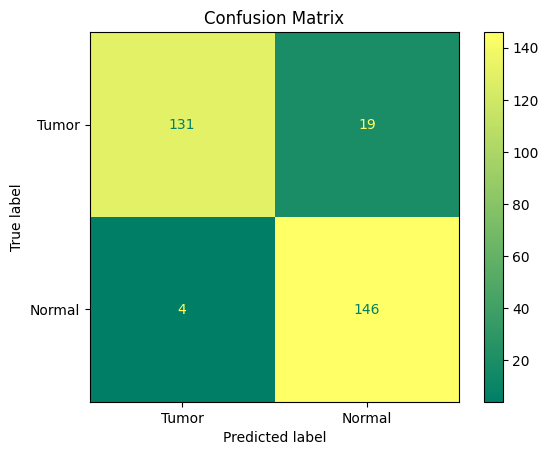

10/10 [==============================] - 0s 7ms/step


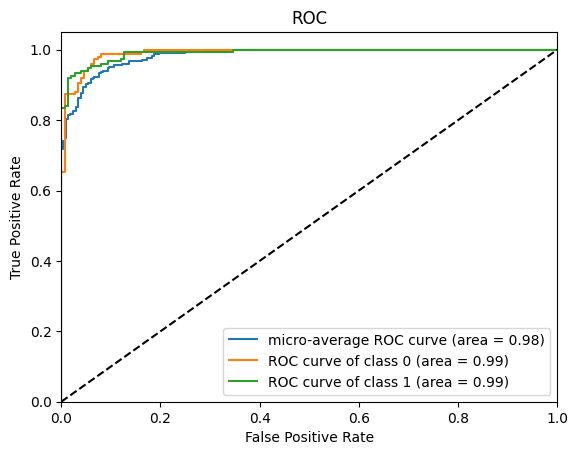

Doğruluk:  92.33333468437195
Kayıp:     0.24496197700500488
----------------------------------------------------------------------------------------------------
2. Fold Eğitiliyor...
Epoch 1/20
270/270 [==============================] - 4s 12ms/step - loss: 0.5109 - accuracy: 0.7727 - precision: 0.7727 - recall: 0.7727 - auc: 0.8548 - val_loss: 0.8656 - val_accuracy: 0.4778 - val_precision: 0.4778 - val_recall: 0.4778 - val_auc: 0.6711 - lr: 0.0010
Epoch 2/20
270/270 [==============================] - 3s 11ms/step - loss: 0.2739 - accuracy: 0.8833 - precision: 0.8833 - recall: 0.8833 - auc: 0.9541 - val_loss: 0.5540 - val_accuracy: 0.7056 - val_precision: 0.7056 - val_recall: 0.7056 - val_auc: 0.8356 - lr: 0.0010
Epoch 3/20
270/270 [==============================] - 3s 11ms/step - loss: 0.1936 - accuracy: 0.9227 - precision: 0.9227 - recall: 0.9227 - auc: 0.9769 - val_loss: 0.2179 - val_accuracy: 0.9037 - val_precision: 0.9037 - val_recall: 0.9037 - val_auc: 0.9728 - lr: 0.0010
Epoch 4

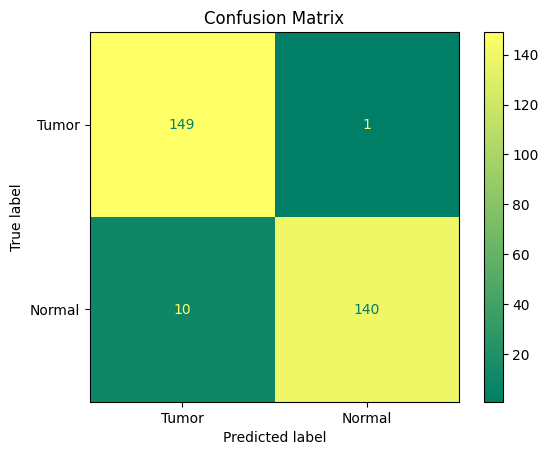

10/10 [==============================] - 0s 8ms/step


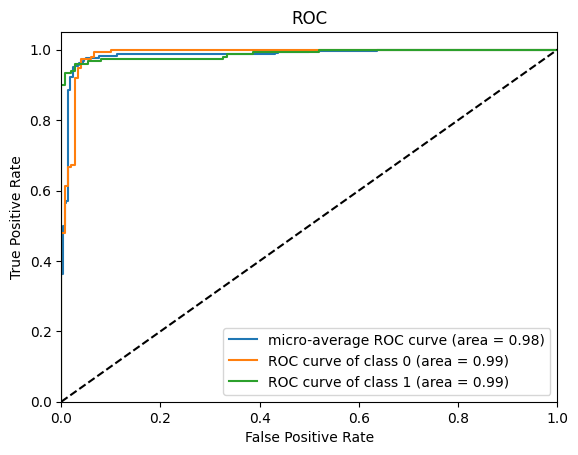

Doğruluk:  96.33333086967468
Kayıp:     0.16233709454536438
----------------------------------------------------------------------------------------------------
3. Fold Eğitiliyor...
Epoch 1/20
270/270 [==============================] - 4s 12ms/step - loss: 0.4792 - accuracy: 0.7935 - precision: 0.7935 - recall: 0.7935 - auc: 0.8791 - val_loss: 0.4585 - val_accuracy: 0.7833 - val_precision: 0.7833 - val_recall: 0.7833 - val_auc: 0.8677 - lr: 0.0010
Epoch 2/20
270/270 [==============================] - 3s 11ms/step - loss: 0.2532 - accuracy: 0.8954 - precision: 0.8954 - recall: 0.8954 - auc: 0.9613 - val_loss: 0.7912 - val_accuracy: 0.6796 - val_precision: 0.6796 - val_recall: 0.6796 - val_auc: 0.8012 - lr: 0.0010
Epoch 3/20
270/270 [==============================] - 3s 11ms/step - loss: 0.1542 - accuracy: 0.9352 - precision: 0.9352 - recall: 0.9352 - auc: 0.9858 - val_loss: 0.1986 - val_accuracy: 0.9315 - val_precision: 0.9315 - val_recall: 0.9315 - val_auc: 0.9750 - lr: 0.0010
Epoch 4

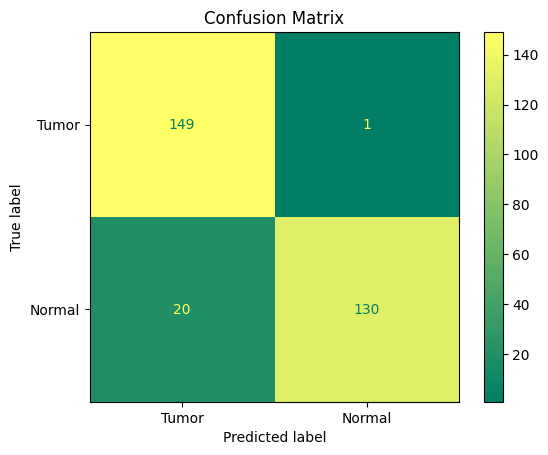

10/10 [==============================] - 0s 6ms/step


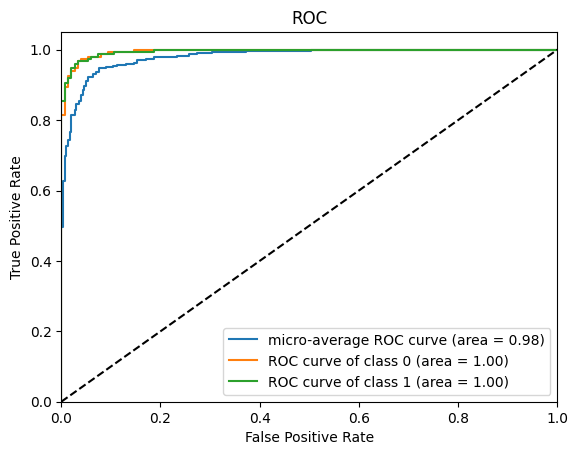

Doğruluk:  93.00000071525574
Kayıp:     0.2144840508699417
----------------------------------------------------------------------------------------------------
4. Fold Eğitiliyor...
Epoch 1/20
270/270 [==============================] - 4s 12ms/step - loss: 0.4530 - accuracy: 0.8111 - precision: 0.8111 - recall: 0.8111 - auc: 0.8907 - val_loss: 0.8484 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000 - val_auc: 0.6706 - lr: 0.0010
Epoch 2/20
270/270 [==============================] - 3s 11ms/step - loss: 0.2413 - accuracy: 0.9028 - precision: 0.9028 - recall: 0.9028 - auc: 0.9643 - val_loss: 0.2557 - val_accuracy: 0.8907 - val_precision: 0.8907 - val_recall: 0.8907 - val_auc: 0.9603 - lr: 0.0010
Epoch 3/20
270/270 [==============================] - 3s 12ms/step - loss: 0.1638 - accuracy: 0.9324 - precision: 0.9324 - recall: 0.9324 - auc: 0.9836 - val_loss: 0.2148 - val_accuracy: 0.9296 - val_precision: 0.9296 - val_recall: 0.9296 - val_auc: 0.9752 - lr: 0.0010
Epoch 4/

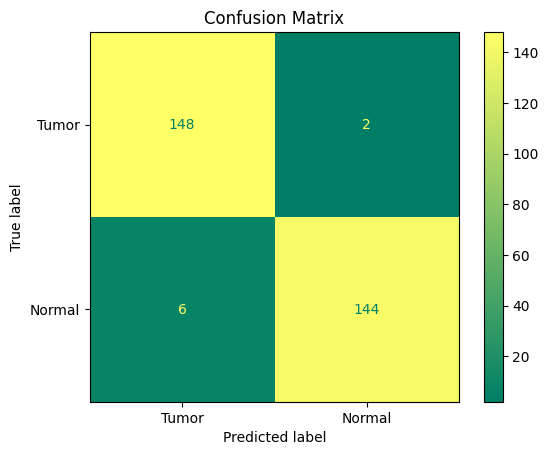

10/10 [==============================] - 0s 8ms/step


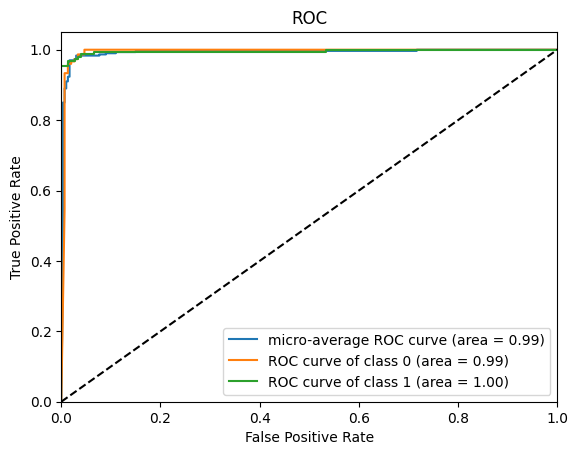

Doğruluk:  97.33333587646484
Kayıp:     0.14106716215610504
----------------------------------------------------------------------------------------------------
5. Fold Eğitiliyor...
Epoch 1/20
270/270 [==============================] - 4s 13ms/step - loss: 0.4587 - accuracy: 0.7972 - precision: 0.7972 - recall: 0.7972 - auc: 0.8806 - val_loss: 0.7726 - val_accuracy: 0.5056 - val_precision: 0.5056 - val_recall: 0.5056 - val_auc: 0.6057 - lr: 0.0010
Epoch 2/20
270/270 [==============================] - 3s 11ms/step - loss: 0.2727 - accuracy: 0.8856 - precision: 0.8856 - recall: 0.8856 - auc: 0.9548 - val_loss: 0.3451 - val_accuracy: 0.8537 - val_precision: 0.8537 - val_recall: 0.8537 - val_auc: 0.9307 - lr: 0.0010
Epoch 3/20
270/270 [==============================] - 3s 11ms/step - loss: 0.1800 - accuracy: 0.9273 - precision: 0.9273 - recall: 0.9273 - auc: 0.9803 - val_loss: 0.2212 - val_accuracy: 0.9333 - val_precision: 0.9333 - val_recall: 0.9333 - val_auc: 0.9709 - lr: 0.0010
Epoch 4

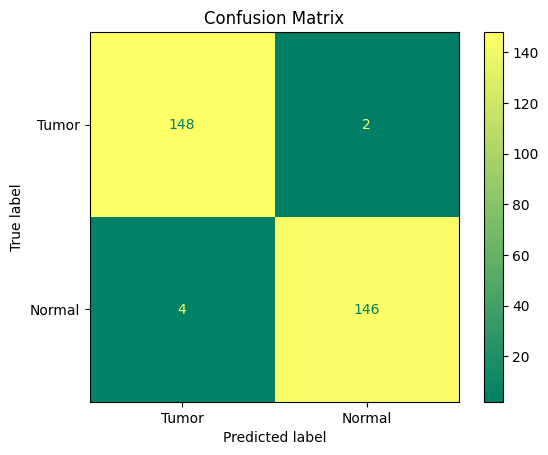

10/10 [==============================] - 0s 13ms/step


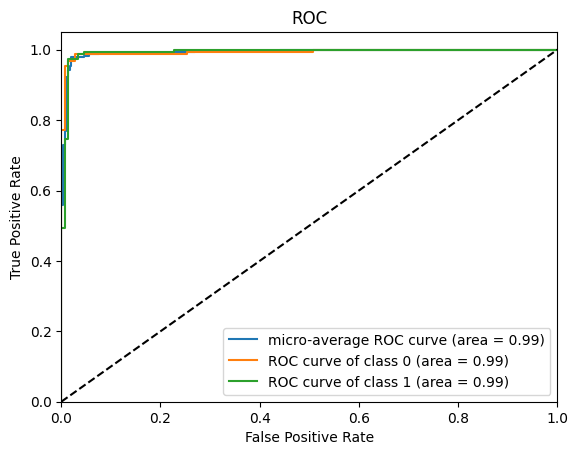

Doğruluk:  98.00000190734863
Kayıp:     0.10571403801441193
Execution Time :  157.22531723976135
****************************************************************************************************


In [27]:
fold_no = 1
model_history_per_fold = []
per_fold_scores = []
start = time()
for train, val in kfold.split(x_train,y_train):
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(3, 3), activation='relu',padding = 'Same', input_shape=(224,224,3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(8, (3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.15))
    
    model.add(Conv2D(16, (3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.15))
    
    model.add(Conv2D(32, (3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(16, (3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(2, activation="softmax"))
    
    
    
    # Model kontrol noktası için yol oluşturma ve ModelCheckpoint callback'ini tanımlama
    checkpoint_filepath = f'model_fold_{fold_no}.h5'
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='min',
        save_best_only=True
    )

    # Optimizasyon sonuçlarından alınan learning rate değerini belirtme (örnek)
    optimized_learning_rate = 0.004261879524120684  # Örnek olarak, kendi değerinizi ekleme

    # ReduceLROnPlateau callback'ine learning rate'i entegre etme
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1, min_delta=1e-5)
    reduce_lr.learning_rate = optimized_learning_rate  # learning rate'i ayarlama

    # EarlyStopping callback'ini tanımlama
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

    # Callback'leri bir listede toplama
    callbacks = [model_checkpoint_callback, reduce_lr, early_stopping]

    # Modeli derleme
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.AUC(name='auc')])

    # Model eğitimini başlatma
    print('-' * 100)
    print(f'{fold_no}. Fold Eğitiliyor...')
    history = model.fit(x_train[train], y_train[train],
                      validation_data=(x_train[val], y_train[val]),
                      batch_size=4,
                      epochs=20,
                      callbacks=callbacks,
                      verbose=1)

    # Model eğitimi tamamlandıktan sonra geçmişi kaydetme
    model_history_per_fold.append(history.history)

    print(f'\n{fold_no}. Fold Eğitim Tamamlandı\n')

    # Modeli test etme ve performans metriklerini değerlendirme
    print(f'{fold_no}. Fold Test Ediliyor...')
    scores = model.evaluate(x_test, y_test)
    report = cls_report(model, x_test, y_test)
    confusion(model, x_test, y_test)
    plot_roc_curve(y_test, model)

    # Fold'a özgü skorları kaydetme
    per_fold_scores.append(scores)
    print("Doğruluk: ", scores[1] * 100)
    print("Kayıp:    ", scores[0])

    # Bir sonraki katlama için sayaçı artırma
    fold_no += 1

# Eğitim süresini hesaplama
end = time()
execution_time = end - start

# Model geçmişini ve skorlarını numpy dizileri olarak kaydetme
np.save(path+'/cnn_history.npy', np.array(model_history_per_fold))
np.save(path+'/cnn_scores.npy', np.array(per_fold_scores))

# Modeli diskte hdf5 formatında kaydetme
model.save(r'C:\Users\tubitak\Desktop\BrainT\dataset\cnn.hdf5')

# Eğitim süresini ve işlemin tamamlandığını bildirme
print("Execution Time : ", execution_time)
print('*' * 100)

In [ ]:
# Eğitilmiş modeli diskten yükleme
cnn = tf.keras.models.load_model(r'C:\Users\tubitak\Desktop\BrainT\dataset\cnn.hdf5')

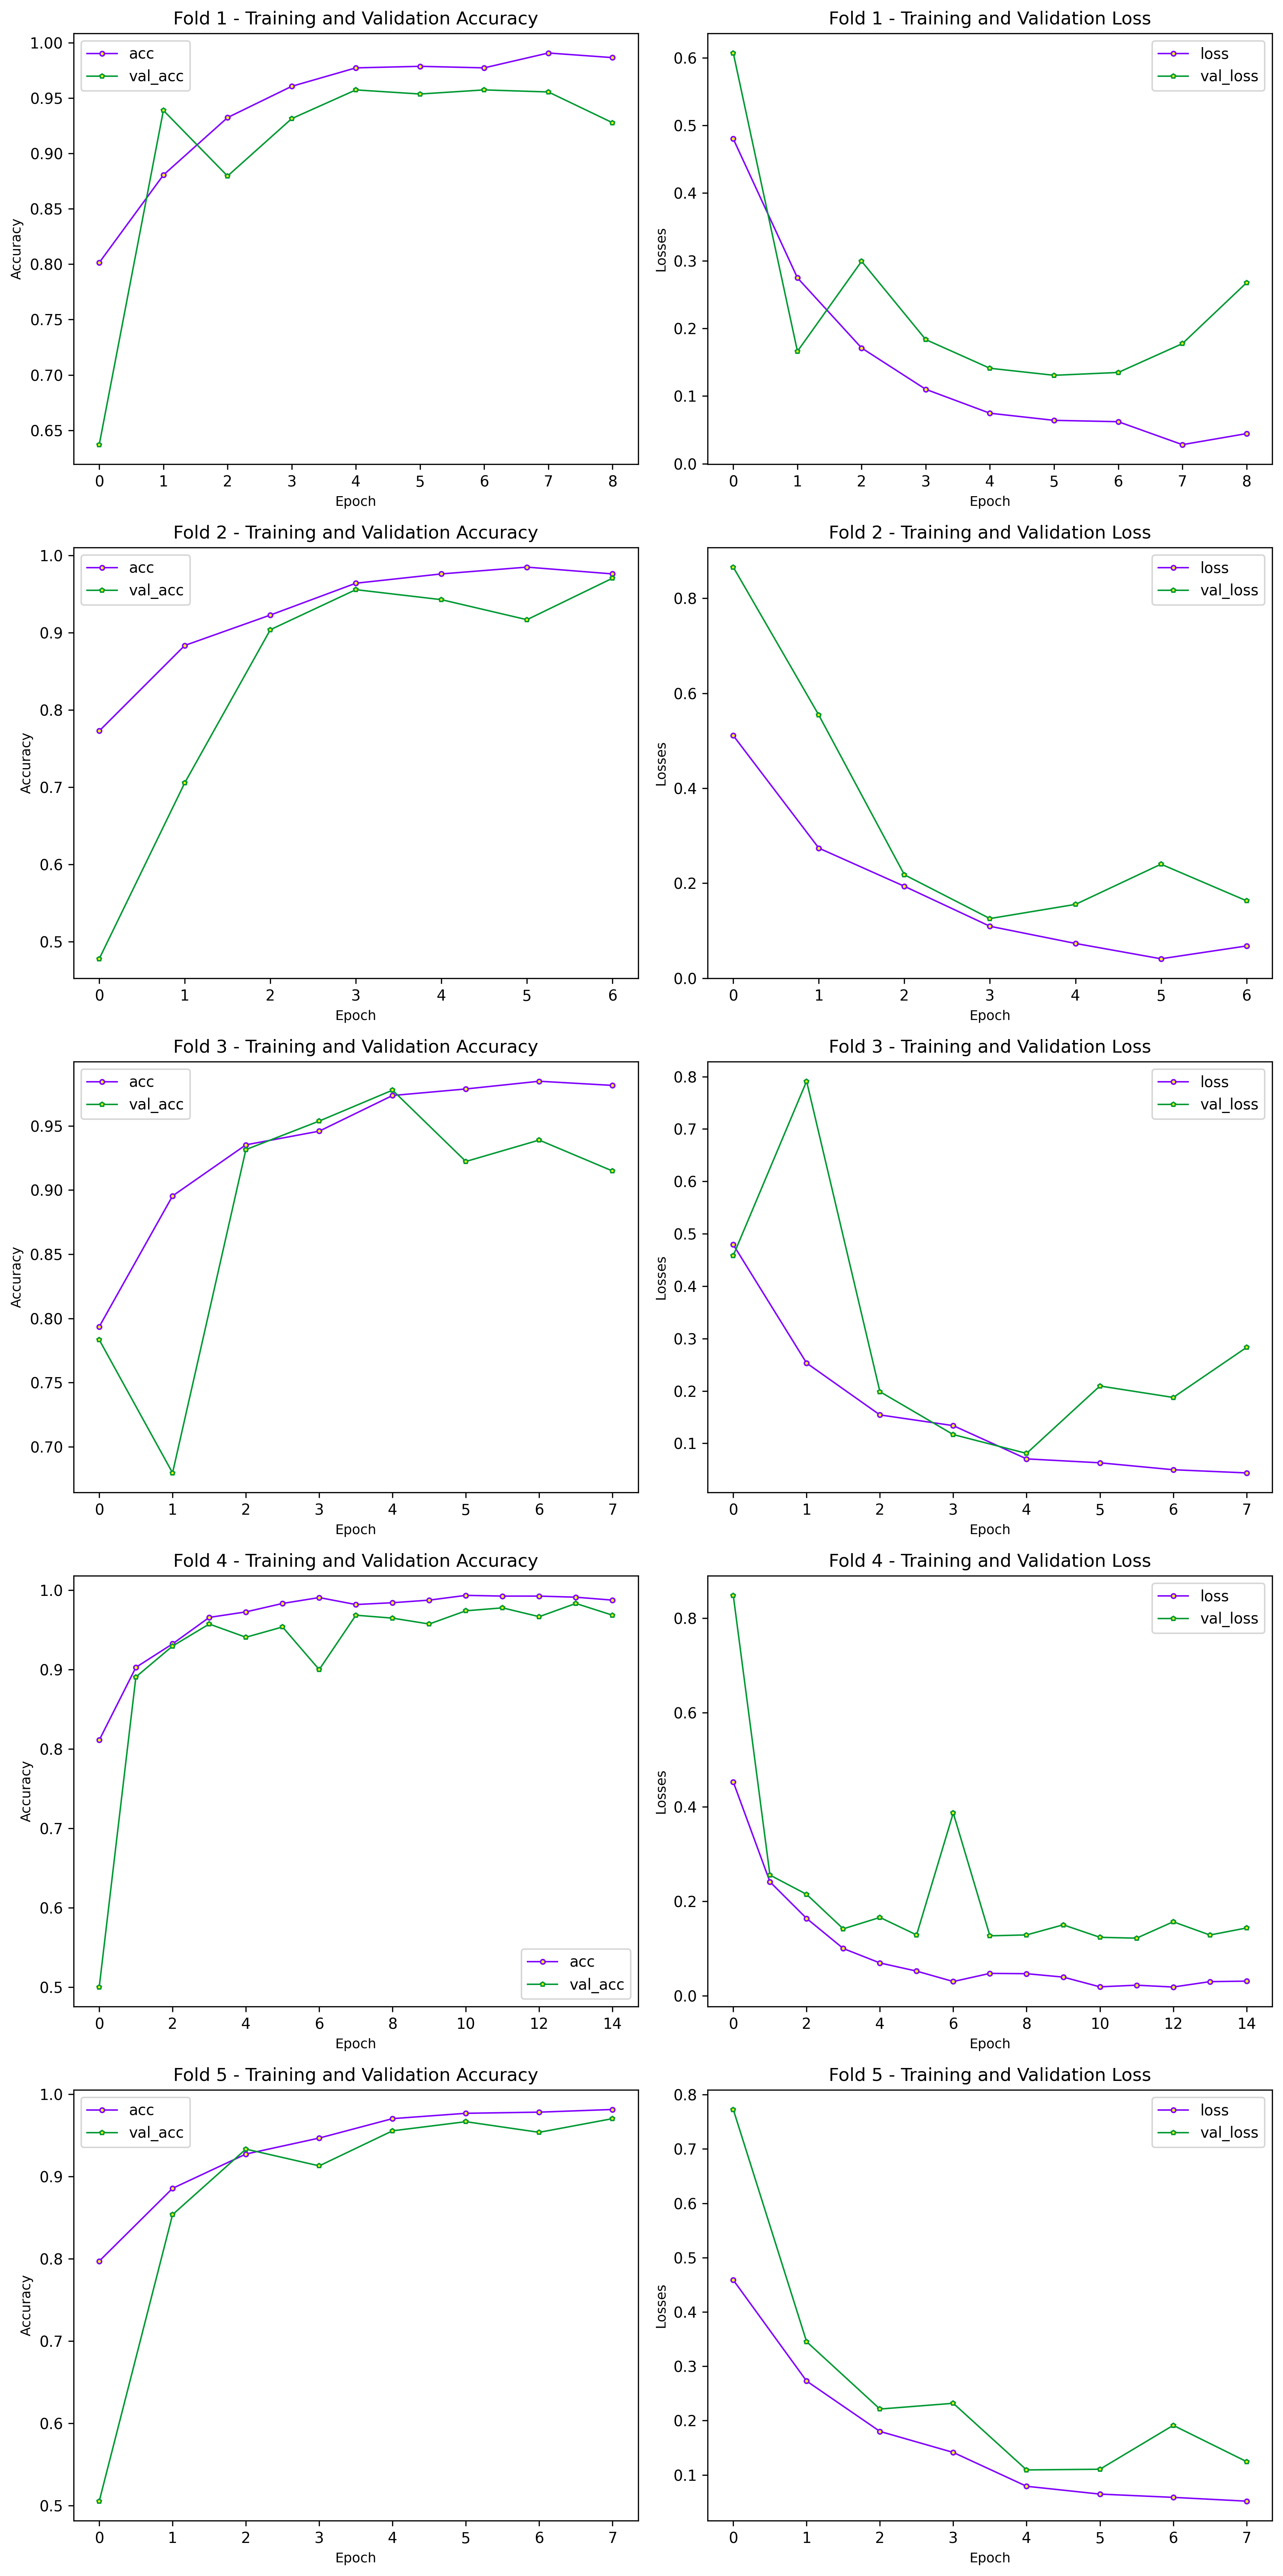

In [28]:
import numpy as np
import matplotlib.pyplot as plt

history = np.load(r'C:\Users\tubitak\Desktop\BrainT\dataset\cnn_history.npy', allow_pickle=True)

plt.figure(figsize=(12, 24), dpi=300)  # Genişlik: 12 , Yükseklik: 24 

for i in range(5):
    # fold için tamamlanan epoch sayısını kullanma
    plt.subplot(5, 2, 2*i+1)
    plt.title('{}. Fold Performance'.format(i + 1), fontdict={'size': 10})
    plt.plot(history[i]['accuracy'], label='acc', color='#8000ff', marker='o', ms=3, mfc='#ffff00', linewidth='1')
    plt.plot(history[i]['val_accuracy'], label='val_acc', color='#009933', marker='p', ms=3, mfc='#ffff00', linewidth='1')
    plt.title(f'Fold {i+1} - Training and Validation Accuracy')
    plt.legend()
    plt.xlabel("Epoch", fontdict={'size': 9})
    plt.ylabel("Accuracy", fontdict={'size': 9})
    
    plt.subplot(5, 2, 2*i+2)
    plt.plot(history[i]['loss'], label='loss', color='#8000ff', marker='o', ms=3, mfc='#ffff00', linewidth='1')
    plt.plot(history[i]['val_loss'], label='val_loss', color='#009933', marker='p', ms=3, mfc='#ffff00', linewidth='1')
    plt.title(f'Fold {i+1} - Training and Validation Loss')
    plt.legend()
    plt.xlabel("Epoch", fontdict={'size': 9})
    plt.ylabel("Losses", fontdict={'size': 9})

plt.tight_layout()  # Adjust layout to make room for titles and labels
plt.savefig('cnn.png')  # Save the figure
plt.show()


1/1 [==============================] - 0s 332ms/step


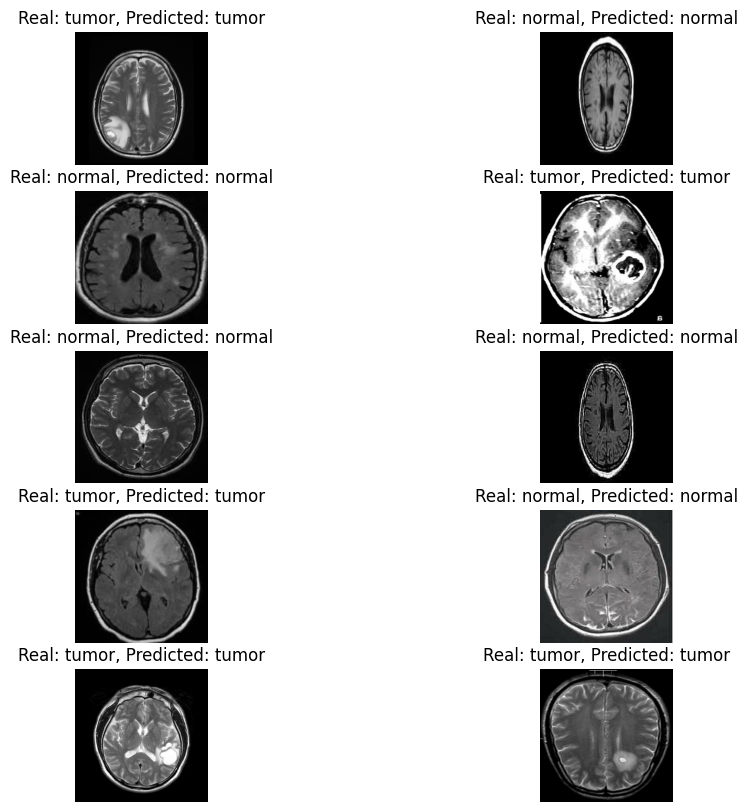

In [30]:
python
Kodu kopyala
import numpy as np
import matplotlib.pyplot as plt

# Test veri kümesinden rastgele 10 örnek seçme
random_indices = np.random.choice(len(x_test), size=10, replace=False)
random_images = x_test[random_indices]
random_labels = y_test[random_indices]

# Seçilen örnekler için modelden tahminler yapma
predictions = model.predict(random_images)

# Tahminler ve gerçek etiketlerle birlikte görüntüleri görselleştirme
plt.figure(figsize=(11, 10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(random_images[i])  # Görüntüyü çizme
    # Gerçek ve tahmin edilen etiketleri belirtme
    real_label = "tumor" if random_labels[i][1] == 1 else "normal"
    predicted_label = "tumor" if np.argmax(predictions[i]) == 1 else "normal"
    plt.title(f'Real: {real_label}, Predicted: {predicted_label}')
    plt.axis('off')  # Eksenleri kapatma
plt.show()  # Görüntüleri gösterme

## Model: ResNet50

ResNet50, Microsoft Research tarafından geliştirilen ve derin öğrenme alanında önemli bir kilometre taşı olan "Residual Network" (ResNet) mimarisinin 50 katmanlı versiyonudur. Özellikle görüntü sınıflandırma problemleri için tasarlanmış olan ResNet50, ImageNet veri kümesinde eğitilmiş ve geniş bir ölçekte kullanılmaktadır. Model, evrişim (convolutional) katmanlar, grup normalleştirme (batch normalization) katmanları ve özellik çıkarma katmanları gibi bileşenlerden oluşur. ResNet50'nin en belirgin özelliği, "residual block" adı verilen yapıları içermesidir; bu yapılar, katmanların girişten çıkışa doğrudan bağlanmasını sağlayarak, ağın derinliğinin artmasına rağmen geriye doğru yayılma (vanishing gradient) problemini azaltır. Sonuç olarak, ResNet50, derin sinir ağlarının performansını artıran yenilikçi bir mimari sunar ve görsel tanıma ve sınıflandırma gibi alanlarda geniş çapta başarıyla uygulanmaktadır.

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

### Sonuçlar

Beyin tümörü teşhisi için önceden eğitilmiş ağırlıklar kullanılmadan eğitilen bir ResNet50 modelini değerlendirmektedir. Her bir kat için model, Convolutional Neural Network mimarisine sahip olan ResNet50'nin temel mimarisini kullanır. Modelin eğitim sürecinde elde edilen sonuçlara göre, test doğruluğu %94.33 ve AUC değeri 0.9706 olarak ölçülmüştür. Ancak sınıflandırma raporuna göre, Normal sınıfında düşük hassasiyet ve geri çağırma değerleri gözlemlenmiş ve karmaşıklık matrisine bakıldığında Normal sınıfında 16 yanlış tahmin yapıldığı görülmüştür. Bu sonuçlar, modelin bazı durumlarda iyileştirilmeye ihtiyaç duyabileceğini işaret etmektedir. Özellikle, Normal sınıfının tanımlanmasında daha fazla hassasiyet sağlanması gerekebilir. 

---

In [12]:
base_model = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')
out_model = Flatten(name="flatten")(base_model.output)
out_model = Dense(256, activation="relu")(out_model)
out_model = Dense(2,activation="softmax")(out_model)
res = Model(inputs=base_model.input, outputs=out_model)

res.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

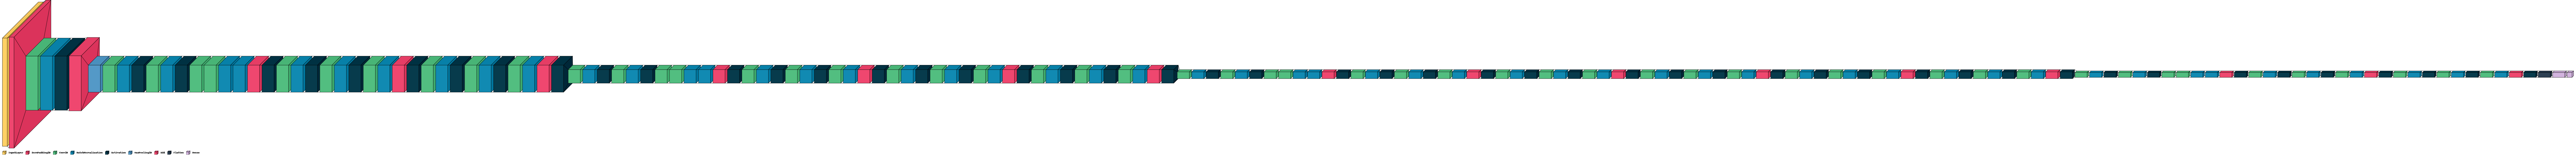

In [32]:
python
Kodu kopyala
# TensorFlow Keras ve gerekli katmanlarını içe aktarma
from tensorflow.keras import layers

# visualkeras ve collections modüllerini içe aktarma
import visualkeras
from collections import defaultdict

# Her bir katman türü için bir renk haritası oluşturma
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#52BE80'         # Conv2D katmanları için yeşil renk
color_map[layers.MaxPooling2D]['fill'] = '#5499C7'   # MaxPooling2D katmanları için mavi renk
color_map[layers.Dropout]['fill'] = '#EC7063'        # Dropout katmanları için kırmızı renk
color_map[layers.Dense]['fill'] = '#D2B4DE'          # Dense (Fully Connected) katmanları için mor renk
color_map[layers.Flatten]['fill'] = '#2E4053'        # Flatten katmanları için lacivert renk

# Modelin katmanlarını görselleştirin ve renk haritasını uygulama
visualkeras.layered_view(res, legend=True, scale_xy=2, scale_z=1, max_z=50, color_map=color_map)

----------------------------------------------------------------------------------------------------
1. Fold Eğitiliyor...
Epoch 1/20
270/270 [==============================] - 19s 58ms/step - loss: 1.6628 - accuracy: 0.7421 - precision: 0.7421 - recall: 0.7421 - auc: 0.8120 - val_loss: 5.8953 - val_accuracy: 0.5426 - val_precision: 0.5426 - val_recall: 0.5426 - val_auc: 0.5426 - lr: 0.0010
Epoch 2/20
270/270 [==============================] - 14s 53ms/step - loss: 0.3093 - accuracy: 0.8819 - precision: 0.8819 - recall: 0.8819 - auc: 0.9455 - val_loss: 12.7979 - val_accuracy: 0.5426 - val_precision: 0.5426 - val_recall: 0.5426 - val_auc: 0.5426 - lr: 0.0010
Epoch 3/20
270/270 [==============================] - 15s 54ms/step - loss: 0.1569 - accuracy: 0.9375 - precision: 0.9375 - recall: 0.9375 - auc: 0.9843 - val_loss: 0.3843 - val_accuracy: 0.8185 - val_precision: 0.8185 - val_recall: 0.8185 - val_auc: 0.9119 - lr: 0.0010
Epoch 4/20
270/270 [==============================] - 15s 54ms/

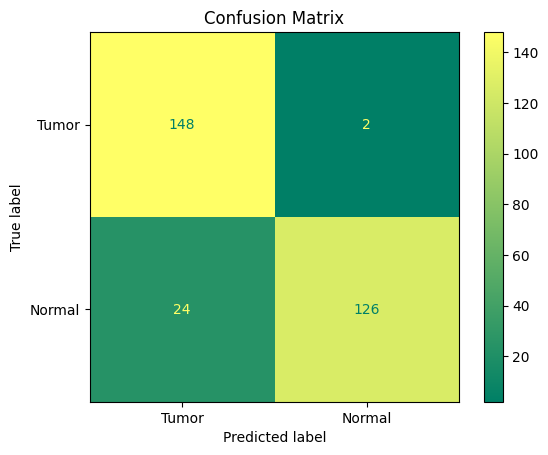

10/10 [==============================] - 0s 28ms/step


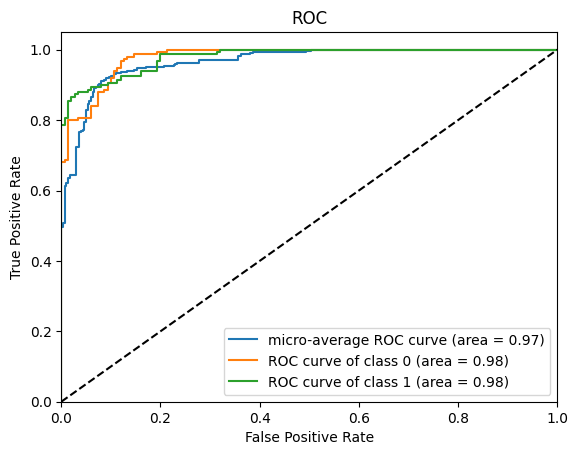

Doğruluk:  91.33333563804626
Kayıp:     0.5137456059455872
----------------------------------------------------------------------------------------------------
2. Fold Eğitiliyor...
Epoch 1/20
270/270 [==============================] - 18s 56ms/step - loss: 2.2674 - accuracy: 0.6796 - precision: 0.6796 - recall: 0.6796 - auc: 0.7225 - val_loss: 0.6752 - val_accuracy: 0.5259 - val_precision: 0.5259 - val_recall: 0.5259 - val_auc: 0.6614 - lr: 0.0010
Epoch 2/20
270/270 [==============================] - 14s 52ms/step - loss: 0.6473 - accuracy: 0.7519 - precision: 0.7519 - recall: 0.7519 - auc: 0.8101 - val_loss: 1.1067 - val_accuracy: 0.4741 - val_precision: 0.4741 - val_recall: 0.4741 - val_auc: 0.5087 - lr: 0.0010
Epoch 3/20
270/270 [==============================] - 14s 53ms/step - loss: 0.5734 - accuracy: 0.7588 - precision: 0.7588 - recall: 0.7588 - auc: 0.8297 - val_loss: 8.3401 - val_accuracy: 0.4741 - val_precision: 0.4741 - val_recall: 0.4741 - val_auc: 0.3983 - lr: 0.0010
Epoch

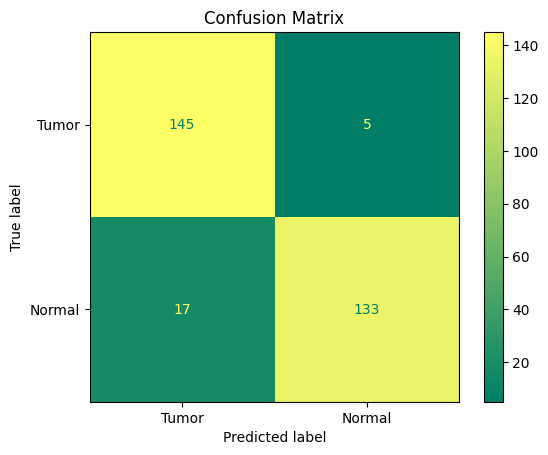

10/10 [==============================] - 0s 28ms/step


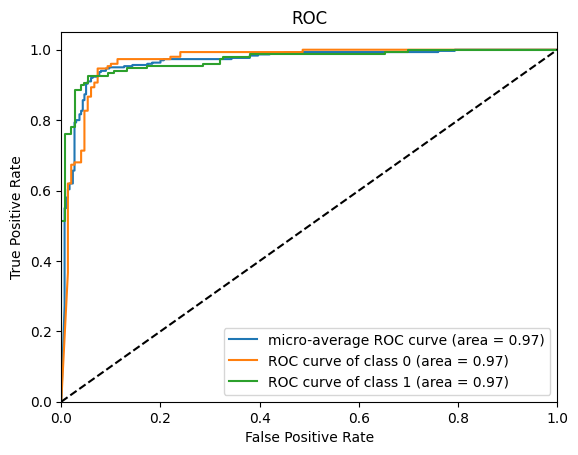

Doğruluk:  92.66666769981384
Kayıp:     0.4064992070198059
----------------------------------------------------------------------------------------------------
3. Fold Eğitiliyor...
Epoch 1/20
270/270 [==============================] - 18s 56ms/step - loss: 1.5221 - accuracy: 0.7875 - precision: 0.7875 - recall: 0.7875 - auc: 0.8453 - val_loss: 2.3383 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000 - val_auc: 0.3892 - lr: 0.0010
Epoch 2/20
270/270 [==============================] - 14s 53ms/step - loss: 0.3050 - accuracy: 0.8986 - precision: 0.8986 - recall: 0.8986 - auc: 0.9542 - val_loss: 0.8432 - val_accuracy: 0.5630 - val_precision: 0.5630 - val_recall: 0.5630 - val_auc: 0.6133 - lr: 0.0010
Epoch 3/20
270/270 [==============================] - 14s 53ms/step - loss: 0.1947 - accuracy: 0.9375 - precision: 0.9375 - recall: 0.9375 - auc: 0.9786 - val_loss: 0.4809 - val_accuracy: 0.8093 - val_precision: 0.8093 - val_recall: 0.8093 - val_auc: 0.8759 - lr: 0.0010
Epoch

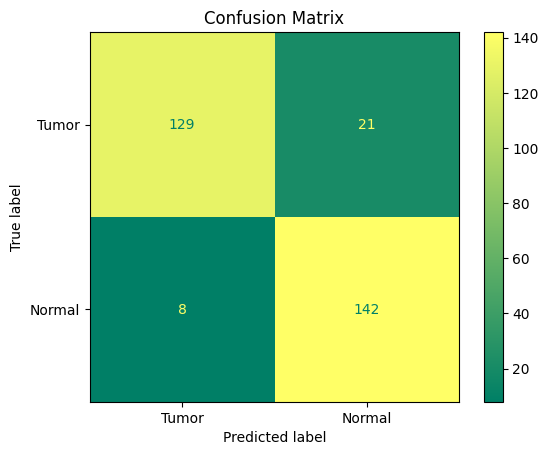

10/10 [==============================] - 0s 28ms/step


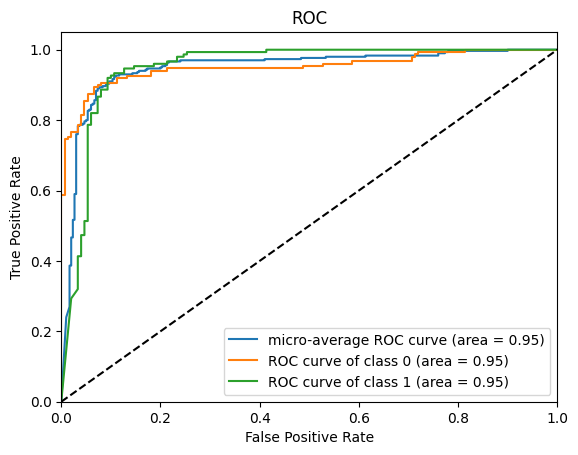

Doğruluk:  90.3333306312561
Kayıp:     0.5911851525306702
----------------------------------------------------------------------------------------------------
4. Fold Eğitiliyor...
Epoch 1/20
270/270 [==============================] - 18s 57ms/step - loss: 1.7407 - accuracy: 0.6977 - precision: 0.6977 - recall: 0.6977 - auc: 0.7529 - val_loss: 33.9094 - val_accuracy: 0.5019 - val_precision: 0.5019 - val_recall: 0.5019 - val_auc: 0.5019 - lr: 0.0010
Epoch 2/20
270/270 [==============================] - 14s 54ms/step - loss: 0.7495 - accuracy: 0.7574 - precision: 0.7574 - recall: 0.7574 - auc: 0.8234 - val_loss: 8.1664 - val_accuracy: 0.5019 - val_precision: 0.5019 - val_recall: 0.5019 - val_auc: 0.5019 - lr: 0.0010
Epoch 3/20
270/270 [==============================] - 14s 54ms/step - loss: 0.5049 - accuracy: 0.8032 - precision: 0.8032 - recall: 0.8032 - auc: 0.8783 - val_loss: 6.2641 - val_accuracy: 0.5185 - val_precision: 0.5185 - val_recall: 0.5185 - val_auc: 0.5469 - lr: 0.0010
Epoch

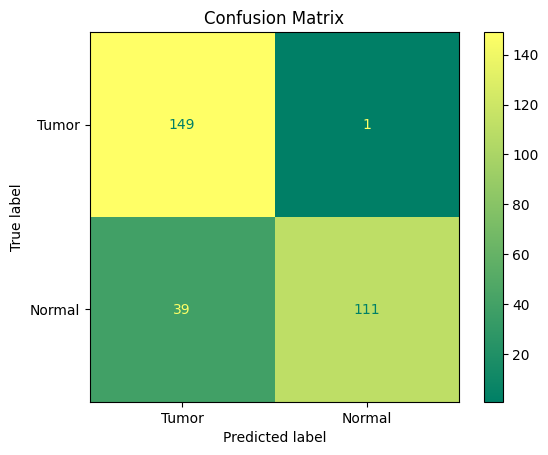

10/10 [==============================] - 0s 32ms/step


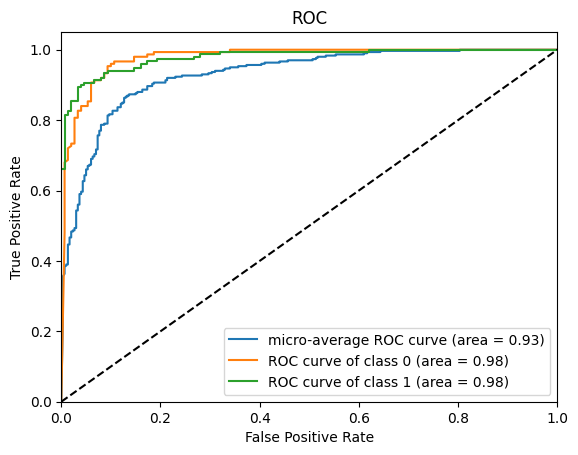

Doğruluk:  86.66666746139526
Kayıp:     0.7077118158340454
----------------------------------------------------------------------------------------------------
5. Fold Eğitiliyor...
Epoch 1/20
270/270 [==============================] - 24s 67ms/step - loss: 2.2131 - accuracy: 0.6917 - precision: 0.6917 - recall: 0.6917 - auc: 0.7454 - val_loss: 0.6933 - val_accuracy: 0.4815 - val_precision: 0.4815 - val_recall: 0.4815 - val_auc: 0.5000 - lr: 0.0010
Epoch 2/20
270/270 [==============================] - 16s 60ms/step - loss: 0.5529 - accuracy: 0.7519 - precision: 0.7519 - recall: 0.7519 - auc: 0.8256 - val_loss: 0.9590 - val_accuracy: 0.4815 - val_precision: 0.4815 - val_recall: 0.4815 - val_auc: 0.6089 - lr: 0.0010
Epoch 3/20
270/270 [==============================] - 16s 60ms/step - loss: 0.6146 - accuracy: 0.7829 - precision: 0.7829 - recall: 0.7829 - auc: 0.8504 - val_loss: 4.5182 - val_accuracy: 0.4815 - val_precision: 0.4815 - val_recall: 0.4815 - val_auc: 0.4911 - lr: 0.0010
Epoch

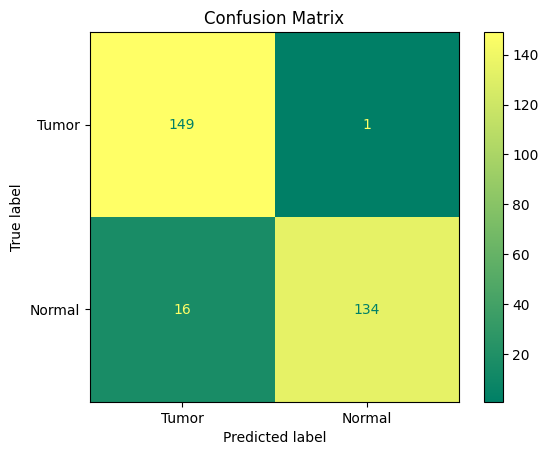

10/10 [==============================] - 0s 32ms/step


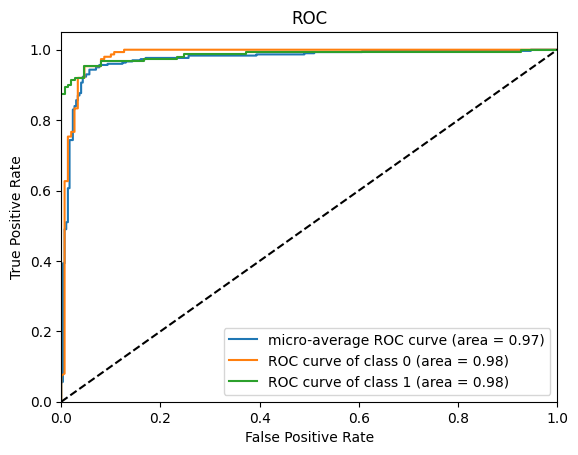

Doğruluk:  94.33333277702332
Kayıp:     0.27739760279655457
Execution Time :  1182.3766725063324
****************************************************************************************************


In [33]:
fold_no = 1
model_history_per_fold = []
per_fold_scores = []
start = time()
for train, val in kfold.split(x_train,y_train):
    base_model = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')

  
    out_model = Flatten(name="flatten")(base_model.output)
    out_model = Dense(256, activation="relu")(out_model)
    out_model = Dense(2,activation="softmax")(out_model)

    res = Model(inputs=base_model.input, outputs=out_model)
    
    # Model kontrol noktası için yol oluşturma ve ModelCheckpoint callback'ini tanımlama
    checkpoint_filepath = f'model_fold_{fold_no}.h5'
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='min',
        save_best_only=True
    )

    # Optimizasyon sonuçlarından alınan learning rate değerini belirtme (örnek)
    optimized_learning_rate = 0.004261879524120684  # Örnek olarak, kendi değerinizi ekleme

    # ReduceLROnPlateau callback'ine learning rate'i entegre etme
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001, verbose=1, min_delta=1e-5)
    reduce_lr.learning_rate = optimized_learning_rate  # learning rate'i ayarlama

    # EarlyStopping callback'ini tanımlama
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

    # Callback'leri bir listede toplama
    callbacks = [model_checkpoint_callback, reduce_lr, early_stopping]

    # Modeli derleme
    res.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.AUC(name='auc')])

    # Model eğitimini başlatma
    print('-' * 100)
    print(f'{fold_no}. Fold Eğitiliyor...')
    history = res.fit(x_train[train], y_train[train],
                      validation_data=(x_train[val], y_train[val]),
                      batch_size=4,
                      epochs=20,
                      callbacks=callbacks,
                      verbose=1)

    # Model eğitimi tamamlandıktan sonra geçmişi kaydetme
    model_history_per_fold.append(history.history)

    print(f'\n{fold_no}. Fold Eğitim Tamamlandı\n')

    # Modeli test etme ve performans metriklerini değerlendirme
    print(f'{fold_no}. Fold Test Ediliyor...')
    scores = res.evaluate(x_test, y_test)
    report = cls_report(res, x_test, y_test)
    confusion(res, x_test, y_test)
    plot_roc_curve(y_test, res)

    # Fold'a özgü skorları kaydetme
    per_fold_scores.append(scores)
    print("Doğruluk: ", scores[1] * 100)
    print("Kayıp:    ", scores[0])

    # Bir sonraki katlama için sayaçı artırma
    fold_no += 1

# Eğitim süresini hesaplama
end = time()
execution_time = end - start

# Model geçmişini ve skorlarını numpy dizileri olarak kaydetme
np.save(path+'/res_history.npy', np.array(model_history_per_fold))
np.save(path+'/res_scores.npy', np.array(per_fold_scores))

# Modeli diskte hdf5 formatında kaydetme
res.save(r'C:\Users\tubitak\Desktop\BrainT\dataset\res.hdf5')

# Eğitim süresini ve işlemin tamamlandığını bildirme
print("Execution Time : ", execution_time)
print('*' * 100)

In [ ]:
# Eğitilmiş modeli diskten yükleme
res = tf.keras.models.load_model(r'C:\Users\tubitak\Desktop\BrainT\dataset\res.hdf5')

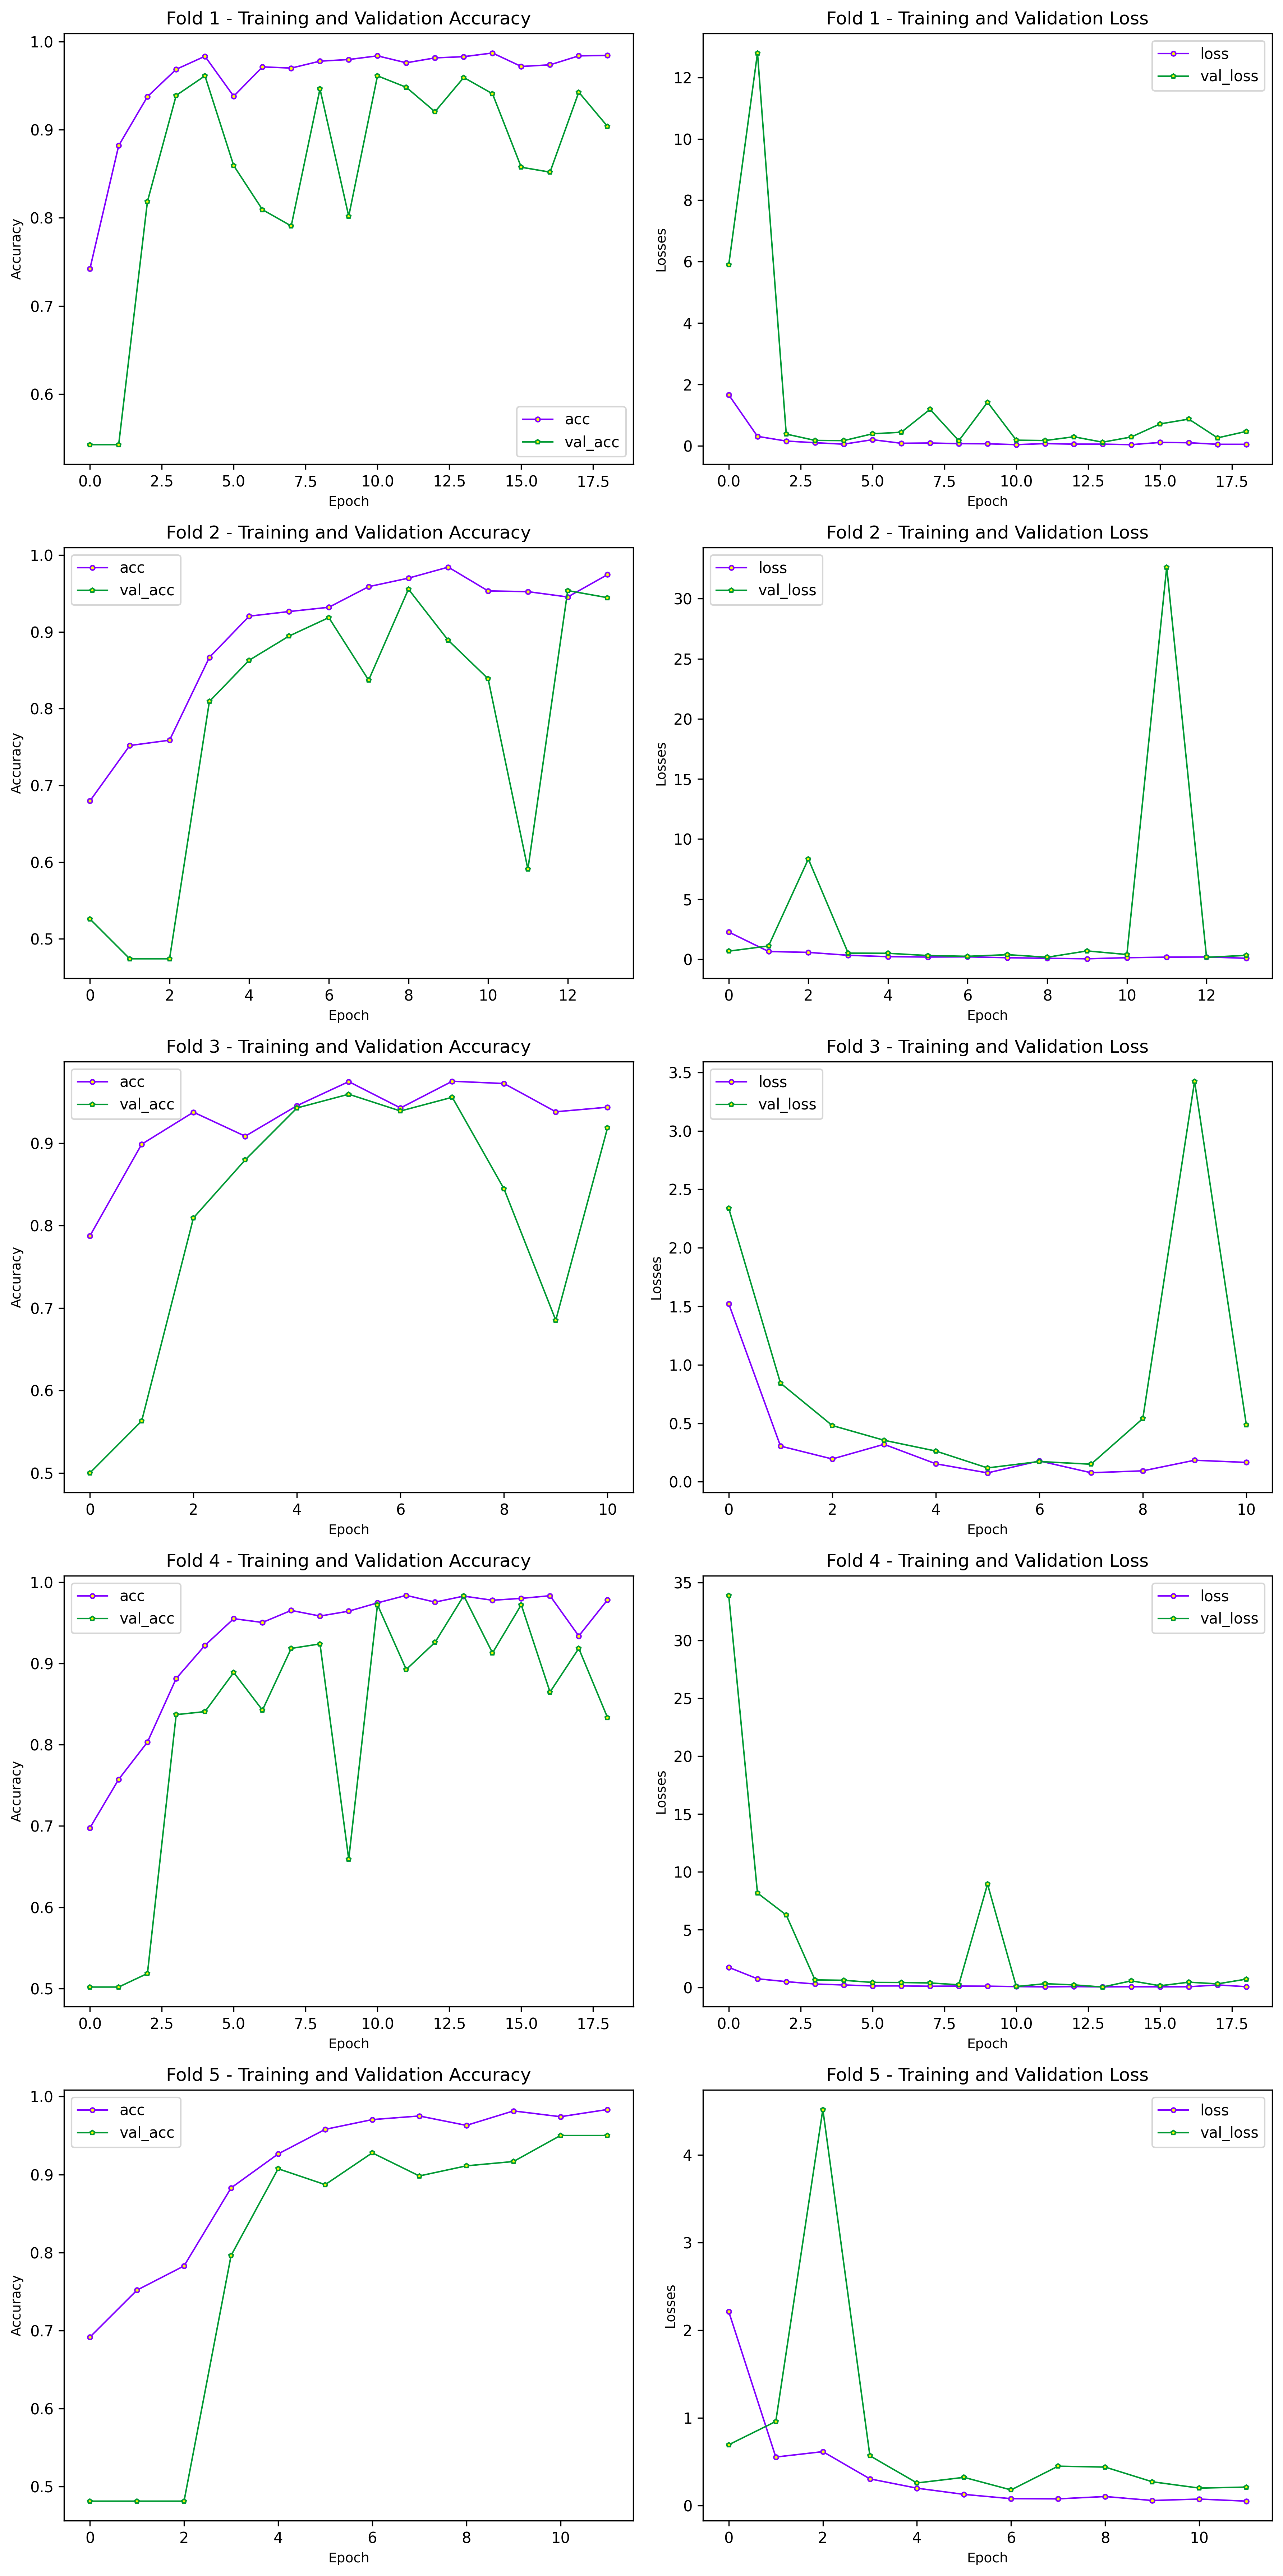

In [34]:
import numpy as np
import matplotlib.pyplot as plt

history = np.load(r'C:\Users\tubitak\Desktop\BrainT\dataset\rs_history.npy', allow_pickle=True)

plt.figure(figsize=(12, 24), dpi=300)  # Genişlik: 12 , Yükseklik: 24 

for i in range(5):
    # fold için tamamlanan epoch sayısını kullanms
    plt.subplot(5, 2, 2*i+1)
    plt.title('{}. Fold Performance'.format(i + 1), fontdict={'size': 10})
    plt.plot(history[i]['accuracy'], label='acc', color='#8000ff', marker='o', ms=3, mfc='#ffff00', linewidth='1')
    plt.plot(history[i]['val_accuracy'], label='val_acc', color='#009933', marker='p', ms=3, mfc='#ffff00', linewidth='1')
    plt.title(f'Fold {i+1} - Training and Validation Accuracy')
    plt.legend()
    plt.xlabel("Epoch", fontdict={'size': 9})
    plt.ylabel("Accuracy", fontdict={'size': 9})
    
    plt.subplot(5, 2, 2*i+2)
    plt.plot(history[i]['loss'], label='loss', color='#8000ff', marker='o', ms=3, mfc='#ffff00', linewidth='1')
    plt.plot(history[i]['val_loss'], label='val_loss', color='#009933', marker='p', ms=3, mfc='#ffff00', linewidth='1')
    plt.title(f'Fold {i+1} - Training and Validation Loss')
    plt.legend()
    plt.xlabel("Epoch", fontdict={'size': 9})
    plt.ylabel("Losses", fontdict={'size': 9})

plt.tight_layout()  # Adjust layout to make room for titles and labels
plt.savefig('res.png')  # Save the figure
plt.show()


1/1 [==============================] - 1s 531ms/step


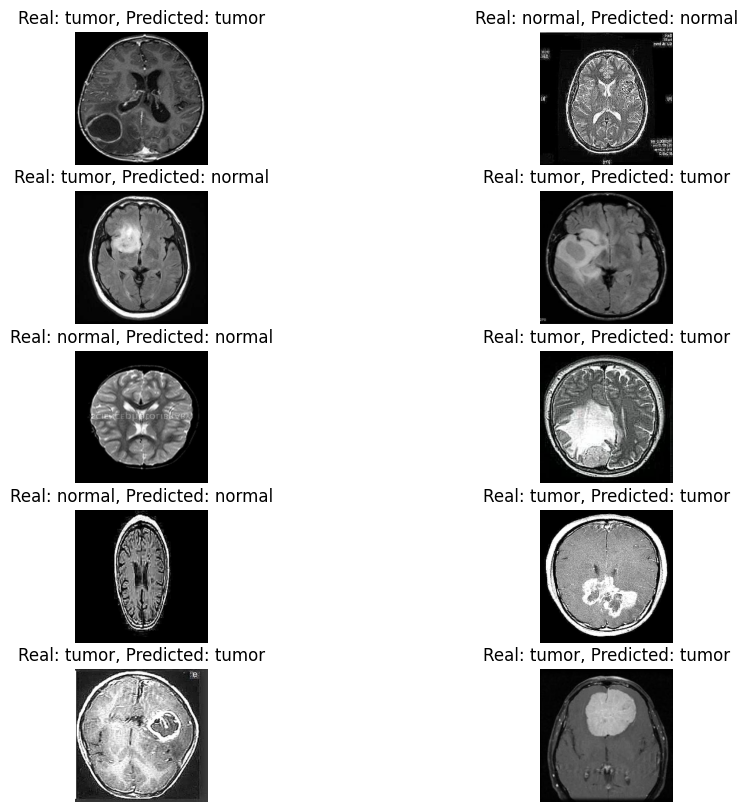

In [35]:
python
Kodu kopyala
import numpy as np
import matplotlib.pyplot as plt

# Test veri kümesinden rastgele 10 örnek seçme
random_indices = np.random.choice(len(x_test), size=10, replace=False)
random_images = x_test[random_indices]
random_labels = y_test[random_indices]

# Seçilen örnekler için modelden tahminler yapma
predictions = res.predict(random_images)

# Tahminler ve gerçek etiketlerle birlikte görüntüleri görselleştirme
plt.figure(figsize=(11, 10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(random_images[i])  # Görüntüyü çizme
    # Gerçek ve tahmin edilen etiketleri belirtme
    real_label = "tumor" if random_labels[i][1] == 1 else "normal"
    predicted_label = "tumor" if np.argmax(predictions[i]) == 1 else "normal"
    plt.title(f'Real: {real_label}, Predicted: {predicted_label}')
    plt.axis('off')  # Eksenleri kapatma
plt.show()  # Görüntüleri gösterme